# 11. Monetary Rules and Business Cycles

## Say's Law

Say's Law has been a point of conroversey since the time of John Maynard Keynes. Say's Law asserted that one must produce goods in order to generate income required to purchase goods. That is, production of value merits the accumulation of value through exchange of the valued product. Keynes phrased this conception, saying "Supply creates its own demand." Clower and Leijonhufvud, however, reformulate Say with the phrase "_the net value of an individual's planned trades is identically zero."_ Say's Law, in this approach, is simply an accounting identity that describes 1) the nature of of imbalances that are generated from excess supplies in a particular market and 2) the particular problems that an excess supply or excess demand for money generates for (non-money) goods markets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [2]:
data_dict = {"Y":"GDP",
             "y":"GDPC1",
             "Business Inventories":"BUSINV",
             "Dollar Index": "DTWEXBGS",
             "CPI":"CPIAUCSL",

             "$y^*$":"GDPPOT",
            "$Y^*$":"NGDPPOT"}

rates_dict ={"FFR": "DFF",
             "$r_{3M}$":"TB3MS",
             "$r_{1}$": "DGS1",
             "$r_{10}$": "DGS10",
             "$r_{30}$": "DGS30"}
freq = "M"
start = datetime.datetime(1950, 1, 1)
# end = datetime.datetime(1985, 12, 31)
end =datetime.datetime.today()
data = {}
data["Level"] = gather_data(data_dict, start, 
          end = end, freq = freq)
# data["Level"]["$P_{Deflator}$"] = data["Level"]["Y"].div(data["Level"]["y"])
data["Level"]["Real Business Inventories"] = data["Level"]["Business Inventories"].div(data["Level"]["CPI"].div(100))
for y in ["Y", "y","$y^*$","$Y^*$"]:
    # fill in missing monthly observations since data is quarterly
    data["Level"][y] = data["Level"][y].interpolate(method='polynomial', order=3)  


rates =  gather_data(rates_dict, start, 
          end = end, freq = freq)
rates = rates.div(100)

In [3]:
diff = 12
data["Log"] = np.log(data["Level"])
data["Log"]["Y Gap"] =  data["Log"]["Y"].sub(data["Log"]["$Y^*$"]) 
data["Log"]["y Gap"] =  data["Log"]["y"].sub(data["Log"]["$y^*$"]) 
data["Rates"] = data["Log"].diff(diff)

for rate in rates:
    data["Rates"][rate] = rates[rate]
    data["Log"][rate] = rates[rate]

Text(0.5, 0, '')

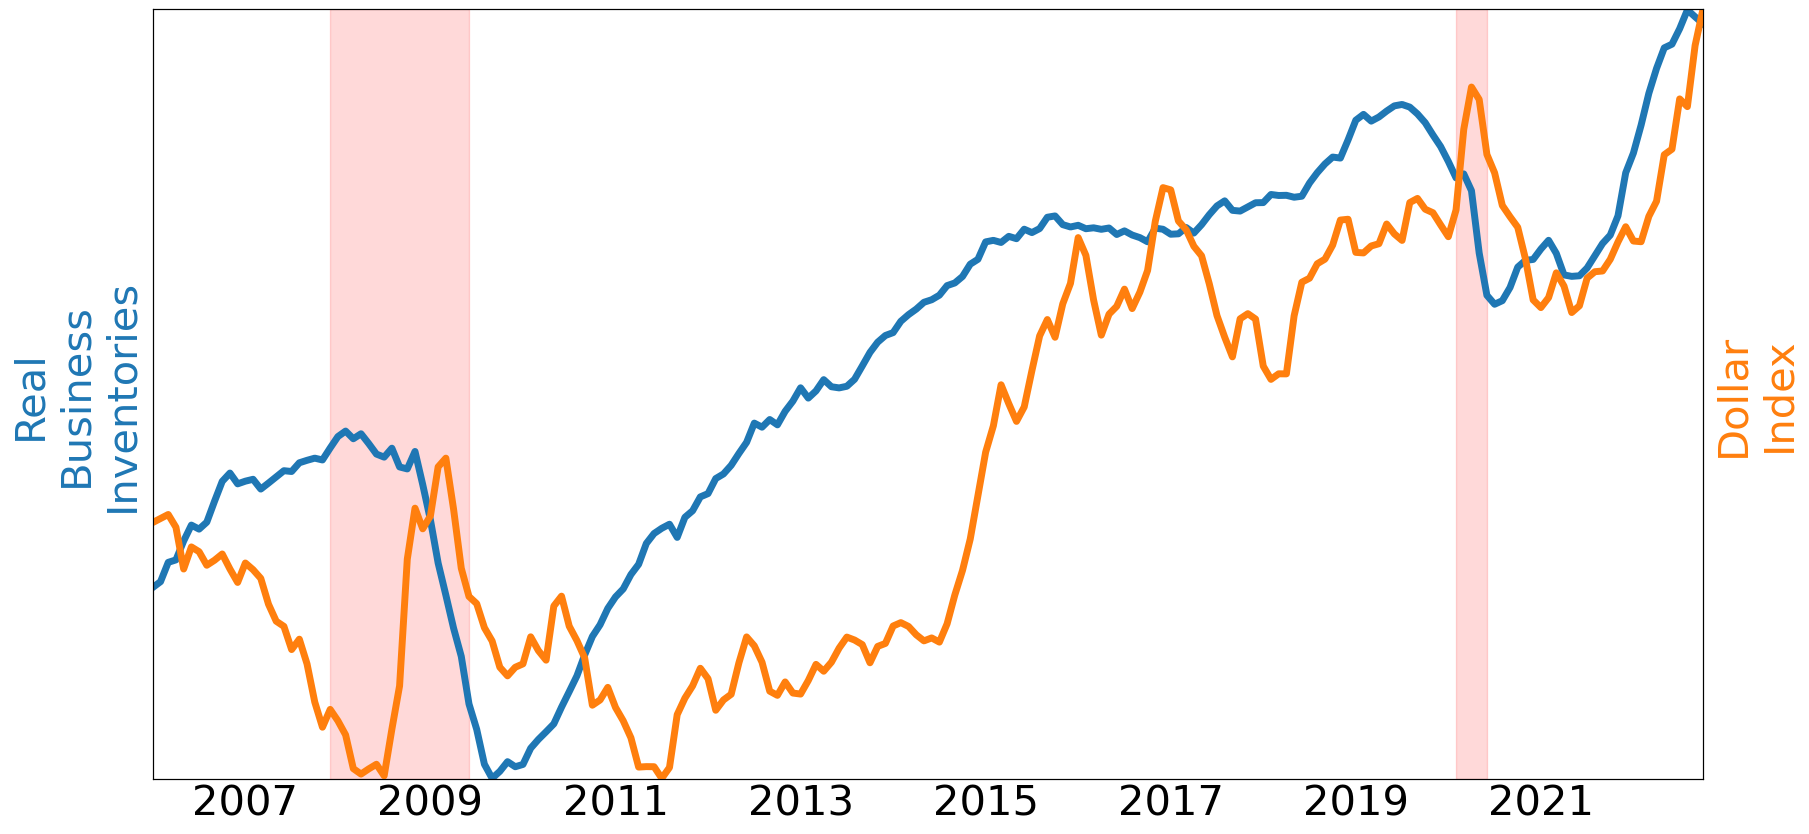

In [4]:
plt.rcParams.update({"font.size":30})
plt.rcParams['axes.ymargin'] = 0.001
plt.rcParams['axes.xmargin'] = 0
axs = {}
fig, axs[0] = plt.subplots(figsize = (20,10))
axs[1] = axs[0].twinx()
plot_keys = ["Real Business Inventories", "Dollar Index"]
plot_data = data["Level"][plot_keys].loc["2006":]
for i in range(2):
    ax = axs[i]
    key = plot_keys[i]
    color = "C" + str(i)
    plot_data[key].plot.line(linewidth = 5, 
                        ax = ax, 
                        color = color, 
                        legend = False)
    ax.set_yticklabels([])#ax.get_yticks(), color = color)
    ax.set_ylabel(key.replace(" ", "\n"), color = color)
    ax.tick_params(axis=u'both', which=u'both',length=0)

# mark economic downturns with axvspan
axs[0].axvspan("2007-12", "2009-06", alpha=0.15, color='red')
axs[0].axvspan("2020-02", "2020-06", alpha=0.15, color='red')
axs[0].set_xlabel("")


### Cash Balance Interpretation of Depression: Developing Macroeconomic Intuition
Say had asserted that there never exists a glut of production, but rather, production might not match demands of consumers. For Say, an economic downturn is should be corrected for by the reduction of prices. In the modern context, economists are quite sensitive to fluctions and total expenditures that represents shifts in total demand, rather than relative shifts in demand that net to zero. The problem of an economic downturn is not precisely that individuals desire a different set of goods. While it is likely that certain sectors have overproduced and others have underproduced relative to consumer demands, economic downturns are augmented by rising uncertainty. Instead of leading simply to shifts in resource allocations between productive processes, rising uncertainty leads to an increase in demand for liqudity. This much was recognized by Keynes.

Clower and Leijonhufvud agreed that rising demand for liquidity - demand for money and monetary services - adds an wrinkle that Say appears to have discounted. Yet, in restating Say's Law as Say's principle, that "_the net value of an individual's planned trades is identically zero"_, the authors frame analysis to include the effects of change preference for holding money. As individuals increase their money holdings, the price of money must rise, and the price level must fall. The problem, however, is that the price of goods is relatively slow to adjust to changes in demand for money. Exchange rates, however, are especially sensitive to changes in demand for money. The first figure compares changes in the trade weighted dollar index, a measure of changes in the price of dollars measured in other currencies, with changes in business inventories. Recessions, shaded in pink, are aggregate demand genereated, meaning that they are initated by a jump in demand for money. This jump in demand for dollars is reflected in a rising value of the dollar. Inventorie, on the other hand, take time to be reduced. In order to reduce inventories that have resulted from a preference of consumers and investors to hold more money and less goods requires that not only that inventories be sold, but that the be sold at relatively low prices. Businesses holding these inventories tend to earn losses as the level of inventories is reduced. Once business owners expect that the economic downturn is nearing an end, they will begin to rebuild inventories. The rebound in demand for goods is, in part, a consequence of a fall in demand for money. Thus, as inventories are rebuilt, the velocity of money improves. As portfolio demand for dollars falls, so too does the trade weighted price of the dollar.

Of course, there is a second challenge here; one that is highlighted by Lucas's island model. Recession impact relative prices and, often, are generated by a distortion in relative prices that accompanies monetary and financial expansion during the upswing of the business cycle. If relative prices could readjust on their own at the end of an aggregate demand driven economic expansion, then there would be little to worry about. However, the ending of bubble investment impacts neigboring sectors as labor becomes unemployed and the price of output falls, often below the price at which it had been purchased. Thus, the deflation of an investment bubble tends to reduce the total levels of consumption and investment, both in real and in nominal terms.

### Say's Principle

Clower and Leijonhufvud use a general equilibrium approach to convey monetary disequilibrium. If the average price of goods sufficiently reduced to offset an increase in demand to hold money, there would be no recession. However, the slow pace of price level adjustment generates cyclical swings in total expenditures that lower real incomes. The general glut of production, to borrow Keynes's phrase, is not caused by overproduction, but rather, is caused by under consumption. This underconsumption represents a fall in transactions and an increase in money holdings. Unless prices adjust instantly to the increase in monetary scarcity, an excess supply of goods will be generated.

We can envision at 3 good economy composed of, $x$, $y$ and $m$, where all exchanges of $x$ and $y$ are intermediated by $m$, planned commodity flows must submit to the identity:

$$p_xd_x + p_yd_y - s_{m,0} \equiv 0$$

Planned expenditures must match expected quantity of money available to the agent. We can account for money prices and planned money holdings with the following equation:

$$p_xd_x + p_yd_y + (d_m - s_{m,0}) \equiv 0$$

We can expand this to an $M$ commodity space where $M$ is the money commodity:

Planned Expenditures: $$(d_M -s_{m,0}) + \sum_{i=1}^{m-1}{p_i(d_i-s_{i,0})} \equiv 0$$.

Here, $d_i - s_i$ indicates and excess demand (negative excess supply) of the good $i$. In the following, $x_i = d_i - s_i$ and $X_i = \sum_{j = 1}^{k}{x_{i_j}}$

In [5]:
import pandas as pd
k = 10
Ms = [str(i) for i in range(1,8)]
Ms = Ms + ["M - 1", "M"]
admissible_trades = {}
for C in Ms:
    admissible_trades[str(C)] = {}
    str_c = str(C)
    for I in range(1, k+1):
        if C != "M":
            admissible_trades[str(C)][str(I)] = "$$p_{" + str_c + "}x_{" + str_c + "_{" + str(I) + "}}$$"
        else:
            admissible_trades[str(C)][str(I)] = "$$x_{" + str_c + "_{" + str(I) + "}}$$"            
at_df =pd.DataFrame(admissible_trades)
at_df.rename(columns = {c:"$C_{" +c + "}$" for c in at_df.keys()}, index = {
    i:"$I_{" +i + "}$" for i in at_df.index})
at_df['$$Net$$ $$Value$$'] = 0
at_df.loc[11] = [s.replace("x", "X").replace("_{2}","") for s in at_df.iloc[1].astype(str).values]
at_df.rename(index ={11:"Total $x_i$"}, inplace = True)
# at_df.loc["Total"]["Net Value"] = "???"
at_df

,1,2,3,4,5,6,7,M - 1,M,$$Net$$ $$Value$$
1,$$p_{1}x_{1_{1}}$$,$$p_{2}x_{2_{1}}$$,$$p_{3}x_{3_{1}}$$,$$p_{4}x_{4_{1}}$$,$$p_{5}x_{5_{1}}$$,$$p_{6}x_{6_{1}}$$,$$p_{7}x_{7_{1}}$$,$$p_{M - 1}x_{M - 1_{1}}$$,$$x_{M_{1}}$$,0
2,$$p_{1}x_{1_{2}}$$,$$p_{2}x_{2_{2}}$$,$$p_{3}x_{3_{2}}$$,$$p_{4}x_{4_{2}}$$,$$p_{5}x_{5_{2}}$$,$$p_{6}x_{6_{2}}$$,$$p_{7}x_{7_{2}}$$,$$p_{M - 1}x_{M - 1_{2}}$$,$$x_{M_{2}}$$,0
3,$$p_{1}x_{1_{3}}$$,$$p_{2}x_{2_{3}}$$,$$p_{3}x_{3_{3}}$$,$$p_{4}x_{4_{3}}$$,$$p_{5}x_{5_{3}}$$,$$p_{6}x_{6_{3}}$$,$$p_{7}x_{7_{3}}$$,$$p_{M - 1}x_{M - 1_{3}}$$,$$x_{M_{3}}$$,0
4,$$p_{1}x_{1_{4}}$$,$$p_{2}x_{2_{4}}$$,$$p_{3}x_{3_{4}}$$,$$p_{4}x_{4_{4}}$$,$$p_{5}x_{5_{4}}$$,$$p_{6}x_{6_{4}}$$,$$p_{7}x_{7_{4}}$$,$$p_{M - 1}x_{M - 1_{4}}$$,$$x_{M_{4}}$$,0
5,$$p_{1}x_{1_{5}}$$,$$p_{2}x_{2_{5}}$$,$$p_{3}x_{3_{5}}$$,$$p_{4}x_{4_{5}}$$,$$p_{5}x_{5_{5}}$$,$$p_{6}x_{6_{5}}$$,$$p_{7}x_{7_{5}}$$,$$p_{M - 1}x_{M - 1_{5}}$$,$$x_{M_{5}}$$,0
6,$$p_{1}x_{1_{6}}$$,$$p_{2}x_{2_{6}}$$,$$p_{3}x_{3_{6}}$$,$$p_{4}x_{4_{6}}$$,$$p_{5}x_{5_{6}}$$,$$p_{6}x_{6_{6}}$$,$$p_{7}x_{7_{6}}$$,$$p_{M - 1}x_{M - 1_{6}}$$,$$x_{M_{6}}$$,0
7,$$p_{1}x_{1_{7}}$$,$$p_{2}x_{2_{7}}$$,$$p_{3}x_{3_{7}}$$,$$p_{4}x_{4_{7}}$$,$$p_{5}x_{5_{7}}$$,$$p_{6}x_{6_{7}}$$,$$p_{7}x_{7_{7}}$$,$$p_{M - 1}x_{M - 1_{7}}$$,$$x_{M_{7}}$$,0
8,$$p_{1}x_{1_{8}}$$,$$p_{2}x_{2_{8}}$$,$$p_{3}x_{3_{8}}$$,$$p_{4}x_{4_{8}}$$,$$p_{5}x_{5_{8}}$$,$$p_{6}x_{6_{8}}$$,$$p_{7}x_{7_{8}}$$,$$p_{M - 1}x_{M - 1_{8}}$$,$$x_{M_{8}}$$,0
9,$$p_{1}x_{1_{9}}$$,$$p_{2}x_{2_{9}}$$,$$p_{3}x_{3_{9}}$$,$$p_{4}x_{4_{9}}$$,$$p_{5}x_{5_{9}}$$,$$p_{6}x_{6_{9}}$$,$$p_{7}x_{7_{9}}$$,$$p_{M - 1}x_{M - 1_{9}}$$,$$x_{M_{9}}$$,0
10,$$p_{1}x_{1_{10}}$$,$$p_{2}x_{2_{10}}$$,$$p_{3}x_{3_{10}}$$,$$p_{4}x_{4_{10}}$$,$$p_{5}x_{5_{10}}$$,$$p_{6}x_{6_{10}}$$,$$p_{7}x_{7_{10}}$$,$$p_{M - 1}x_{M - 1_{10}}$$,$$x_{M_{10}}$$,0


$$\sum_{j=1}^{j=K}{x_{ij} \equiv X_i}$$

for each $i$:

$$(i=1, 2, . . . , M - 1, M)$$

We thus define the sum of all excess demands:

$$\sum_{i=1}^{i=M}{p_ix_{i} \equiv 0}$$

> 1) _The proposition is valid for any (uniform) set of prices and for every theoretically admissible set of aggregate EDs;_
>
> 2) _No general statement can be made about the sum of the money values of any proper subset of the aggregate EDs;_ i.s., if one or more of the terms $p_iX_i$ is excluded from the summation in identity (10), we can place no restrictions whatever on the sign or magnitude of the remaining terms;
> 
> 3) The aggregate ED for each commodity in the identity  is defined by identity as the sum over all transactors of _planned_ (notional, intended, desired) purchases or sales of the same commodity. _If aggregate EDs were defined in terms of anything other than planned quantities, we should have no assurance that the aggreate version of SP would still hold_.

## General Equilibrium

> At the beginning of any given bargaining period (implicitly defined as a time interval of sufficient length for everthing we wish to talk about to occur), each transactor formulates a definite trading plan on the basis of a set of provisional prices, $p_0$, which are announced by the trading authority. These plans are communicated to the trading authority who first checks each plan to see that it satisfies SP (individual version), and then sums all plans to arrive at a set of provisional aggregate EDs, $X_0 = (X_{1_0}, X_{2_0}, . . ., X_{M_0})$. If $X_0$ include some elements that are non-zero (by SP - the aggreagte version - at least _two_ elements must be non-zero in this case), the trading authroity knows that individual plans are not mutually consistent at the price vector $p_0$ (i.e., not all planned net trades can be executed as scheduled). It then selects and announces a new set of provisonal prices, $p_1$, and requests the assembled mob of transactors to formulate new plans. This process continues until at some stage, say the _t-th_, then the trading authority manages to announce a price vector $p_t$ at which each and every aggregate ED is exactly equal to zero: i.e., $X_{i_t} \equiv 0$ for $(i=1, 2, . . . , M)$

In order for attainment of general equilibrium, all excess demands and supplies of goods must be diminished to zero. That is, general equilibrium does not simply require that the net sum of excess demands and supplies equal zero - this is necessarily true if you include the money commodity - rather, general equilibrium requires a lowering of price if the good in question suffers an excess supply and raising of a price if the good in question suffers an excess demand. 

### Disequilibrium

> Suppose that the general-equilibrium condition is not satisfied, so that aggregate ED for at least two commodities is non-zero. In this case, the economy may be said to be in a state of disequilibrium. It is impossible for all trades to be executed as planned, so prices and trading plans must be revised. Some of the commodities in aggregate ES may be labor services. It follows that SP is entirely consistent with the existence of large-scale unemployment.




If there is an excess supply of labor, then, by definition, there must exist excess demands for at least one other good; namely, money.

#### General Equilibrium vs. Monetary Equilibrium

Disequilibrium appears on two counts. For our purpose, weare concerned about the existence of an excess demand or supply of money. An excess supply of money implies a net excess demand for goods. And, likewise, and excess demand for money implies a net excess supply of goods. Business cycles are driven by a general excess demand or excess supply of money.

ED for money implies possible sales not executed

#### Excess Supplies and Demands for Money in Aggregate Analysis



## Monetary Rules II
### Price Level Target ($\bar{\pi}_{target}$ $\neq \pi_{target}$)

Rules that most efficiently stabilize expectations will target the level path rather than simply target rates. A rule that targets rates without offsetting for past misses fails to stabilize the growth path of the target variable. To target a level path means that monetary policy will operate to promote a constant average rate of expansion of the target variable. Thus, an average inflation target, like the one targeted by the Federal Reserve, should be a long-run path target that would, in consequence of its adoption, stabilize long-run inflation expectations.

In the next two pairs of visualizations will show how a long-run price level path target expectations of monetary policy. We can always evaluate the expected stance of policy in light of the discrepancy between observed price level and the target value of the price level. We could include a simple interpretive rule that says, deficiencies are compensated for policy that supports aggregate demand expansion while excess in the observed price level are offset by a short-run inflation target of 0%. In the latter case, the observed price level would flatline until the target rose to match the observed price level.

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\4112928087.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


Text(0.5, 0, '')

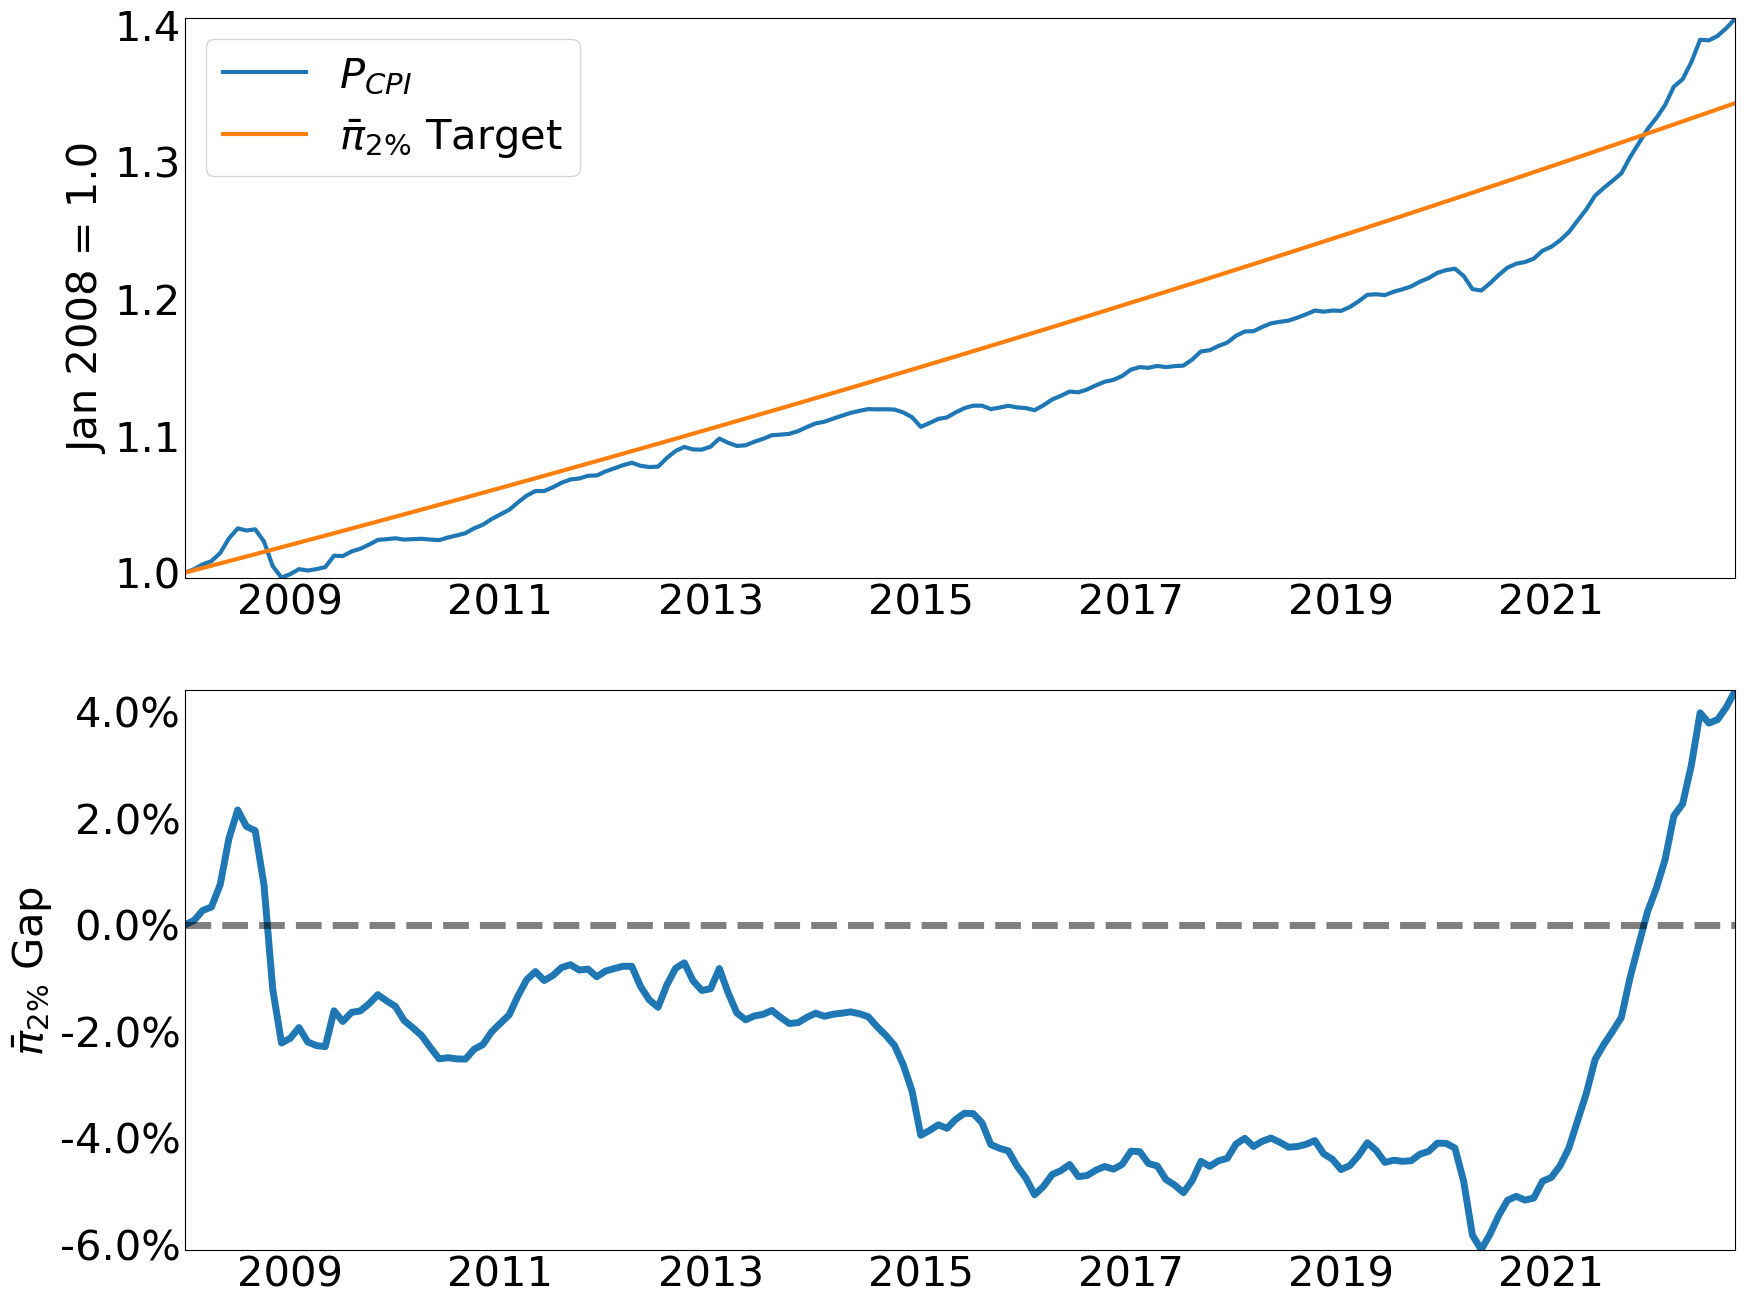

In [6]:
plot_vars = ["CPI"]
plot_df = data["Level"][plot_vars].loc["2008":].rename(columns = {"CPI":"$P_{CPI}$"})
plot_df["$P_{CPI}$"] = plot_df["$P_{CPI}$"].div(plot_df["$P_{CPI}$"].iloc[0])
plot_df["$\\bar{\\pi}_{2\%}$ Target"] = [plot_df["$P_{CPI}$"].iloc[0] * ((1 + .02 / 12) ** i) for i in range(len(plot_df.index))]
# plot_df[plot_vars[0]].plot.line(ax = ax, secondary_y ="CPI", linewidth = 3)
fig, axs = plt.subplots(2,1, figsize = (20,16))
ax = axs[0]
plot_df.plot.line(ax = ax, linewidth = 3)
ax.set_ylabel("Jan 2008 = 1.0")
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("")
ax = axs[1]
plot_df["$\\bar{\\pi}_{2\%}$ Gap"] = 1 - plot_df["$\\bar{\\pi}_{2\%}$ Target"].div(plot_df["$P_{CPI}$"])
plot_df["$\\bar{\\pi}_{2\%}$ Gap"].plot(linewidth = 5, ax = ax)
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("$\\bar{\\pi}_{2\%}$ Gap")
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
ax.set_xlabel("")

#### Fed's Average Target

Interestingly, the Fed adopted the level target just as inflation began to rise. It is unclear that the Federal Reserve will follow through with the average target. More likley, it is an inflation target with upward bias, though officials have not admitted as much. Until they make clear the nature of the "average" target, this is the most obvious interpretation of the new rule. 

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\2045867055.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


Text(0.5, 0, '')

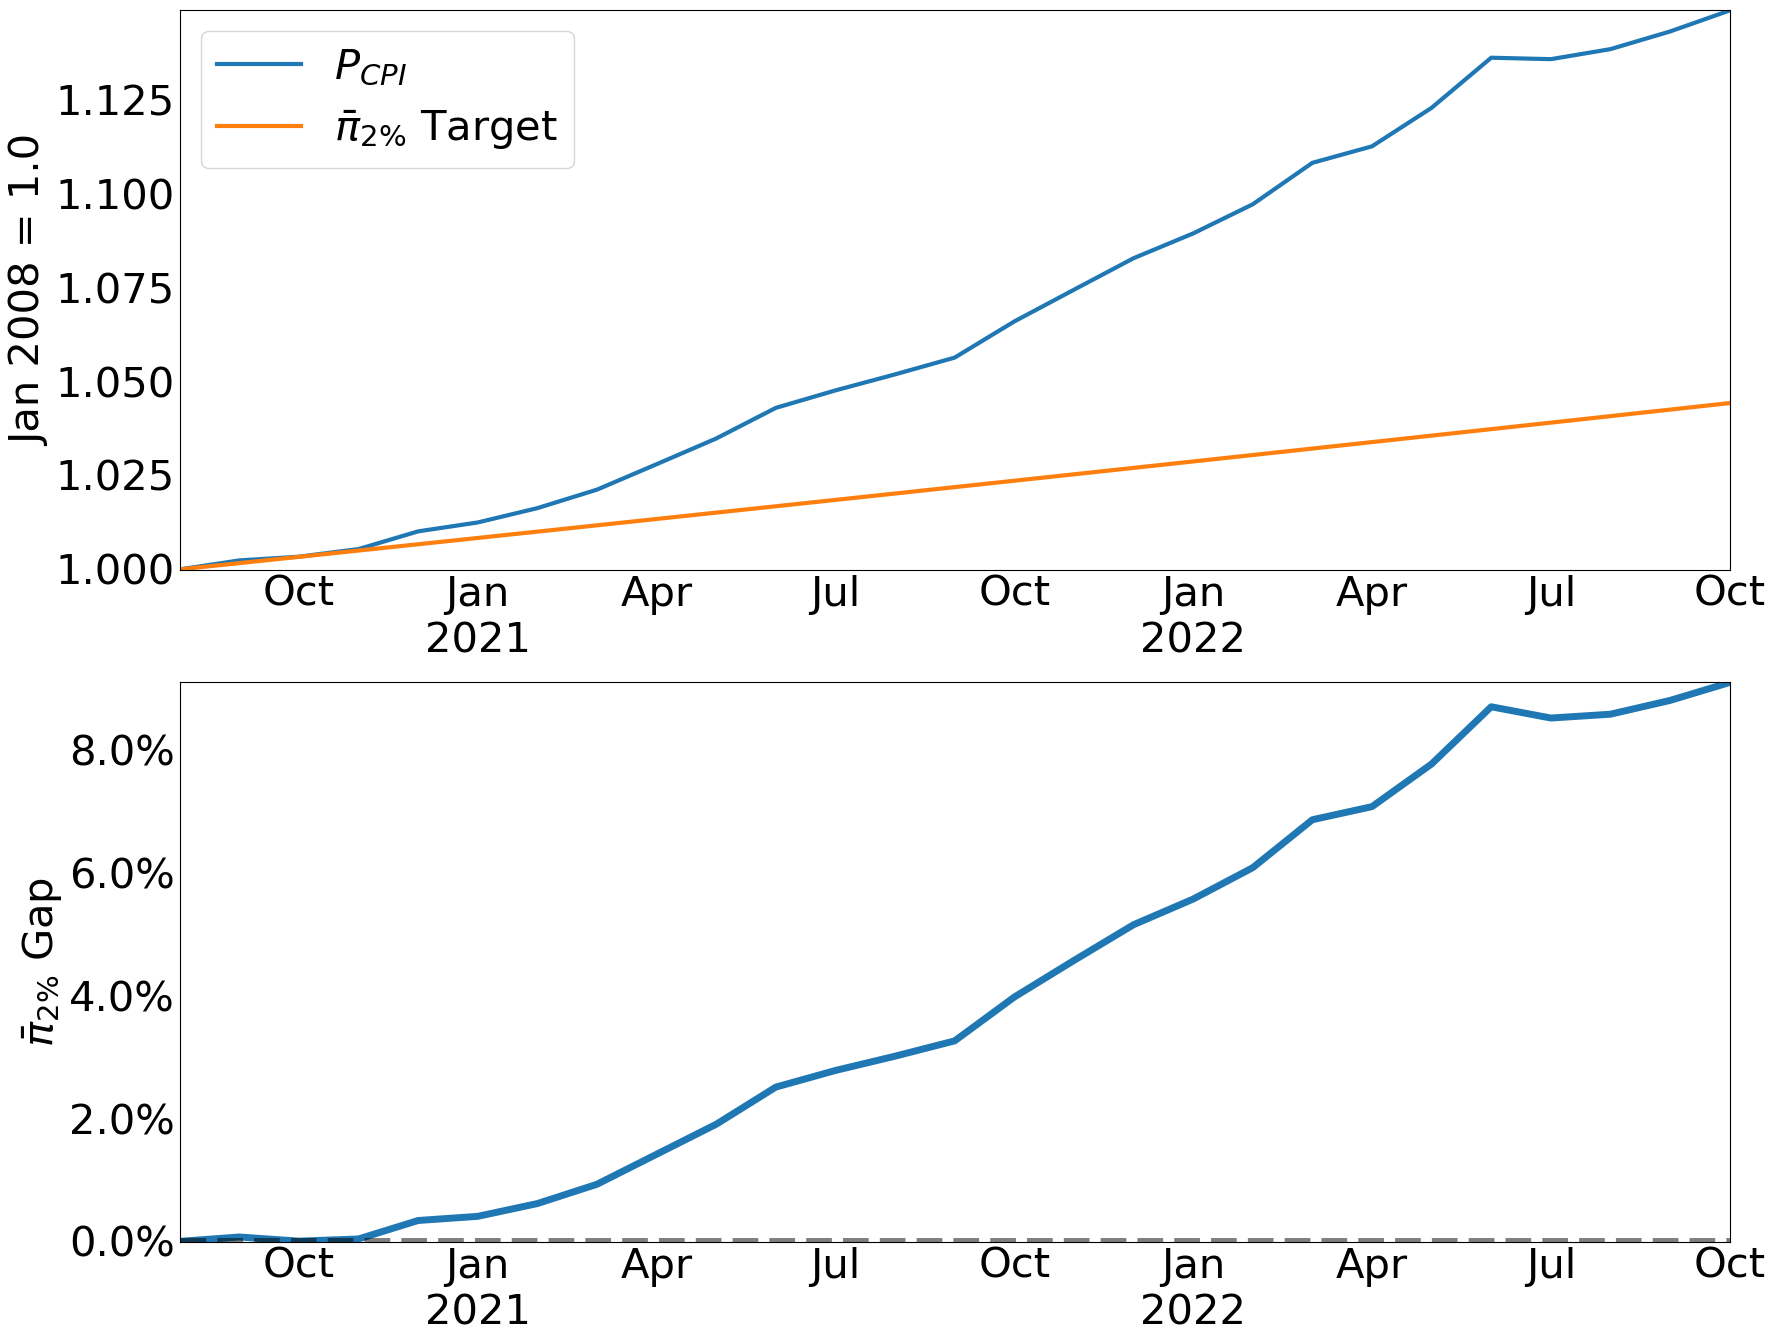

In [7]:
plot_vars = ["CPI"]
plot_df = data["Level"][plot_vars].loc["2020-08":].rename(columns = {"CPI":"$P_{CPI}$"})
plot_df["$P_{CPI}$"] = plot_df["$P_{CPI}$"].div(plot_df["$P_{CPI}$"].iloc[0])
plot_df["$\\bar{\\pi}_{2\%}$ Target"] = [plot_df["$P_{CPI}$"].iloc[0] * ((1 + .02 / 12) ** i) for i in range(len(plot_df.index))]
# plot_df[plot_vars[0]].plot.line(ax = ax, secondary_y ="CPI", linewidth = 3)
fig, axs = plt.subplots(2,1, figsize = (20,16))
ax = axs[0]
plot_df.plot.line(ax = ax, linewidth = 3)
ax.set_ylabel("Jan 2008 = 1.0")
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("")
ax = axs[1]
plot_df["$\\bar{\\pi}_{2\%}$ Gap"] = 1 - plot_df["$\\bar{\\pi}_{2\%}$ Target"].div(plot_df["$P_{CPI}$"])
plot_df["$\\bar{\\pi}_{2\%}$ Gap"].plot(linewidth = 5, ax = ax)
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("$\\bar{\\pi}_{2\%}$ Gap")
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
ax.set_xlabel("")

#### Nominal Income Target

#### 3 Principles (Sumner 2021)

> 1. _Policy needs to target the market forecast._ In 2008, Fed officials relied too much on economic models and not enough on market forecasts. An optimal monetary policy is one that results in the market consensus expecting success. If the Fed is targeting nominal GDP growth of 4\%, then the market should forecast 4\% nominal GDP growth.

> 2. _We need some sort of level targeting regime._ Preferably this would be a level targeting of NGDP, but even price level targeting would be far superior to the current "let bygones be bygones" inflation-targeting regime. The purpose of level targeting is not just to correct past mistakes and provide long-term predictability for the path of NGDP, although that's a worthy goal. More importantly, level targeting would help stabilize the economy by reducing the volatility of nominal spending when the economy is hit by a shock.

> 3. _Policy makers need to adopt a 'whatever it takes' approach to monetary policy._ The primary tool should be open-market purchases and sale of government securities. If not enough securities are available, it would be better to adopt unconventional policies such as purchases of alternative assets or the adoption of negative interest on reserves (or both), rather than just having policy makers throw up their hands and ask for assistance from fiscal authorities. Congress is simply not equipped to implement an effective countercyclical fiscal policy regime. Exhibit A is the major tax cut implemented in 2018, a period of 4\% unemployment.

I have spent much energy emphasizing the importance of maintaining stable inflation expectations. If inflation expectations are anchored, this carries the advantage that aggregate demand increases will be interpreted attempts by monetary policy to stabilize instability in the real side of the economy. However, this carries the disadvantage that if inflation is relatively low, meaning that the growth rate of NGDP is also relatively low, an insufficiently easy monetary policy can lead to relatively low rates of real economic growth. In a regime with high inflation expectations, the rate of inflation and the cyclical component of real GDP are highly correlated.

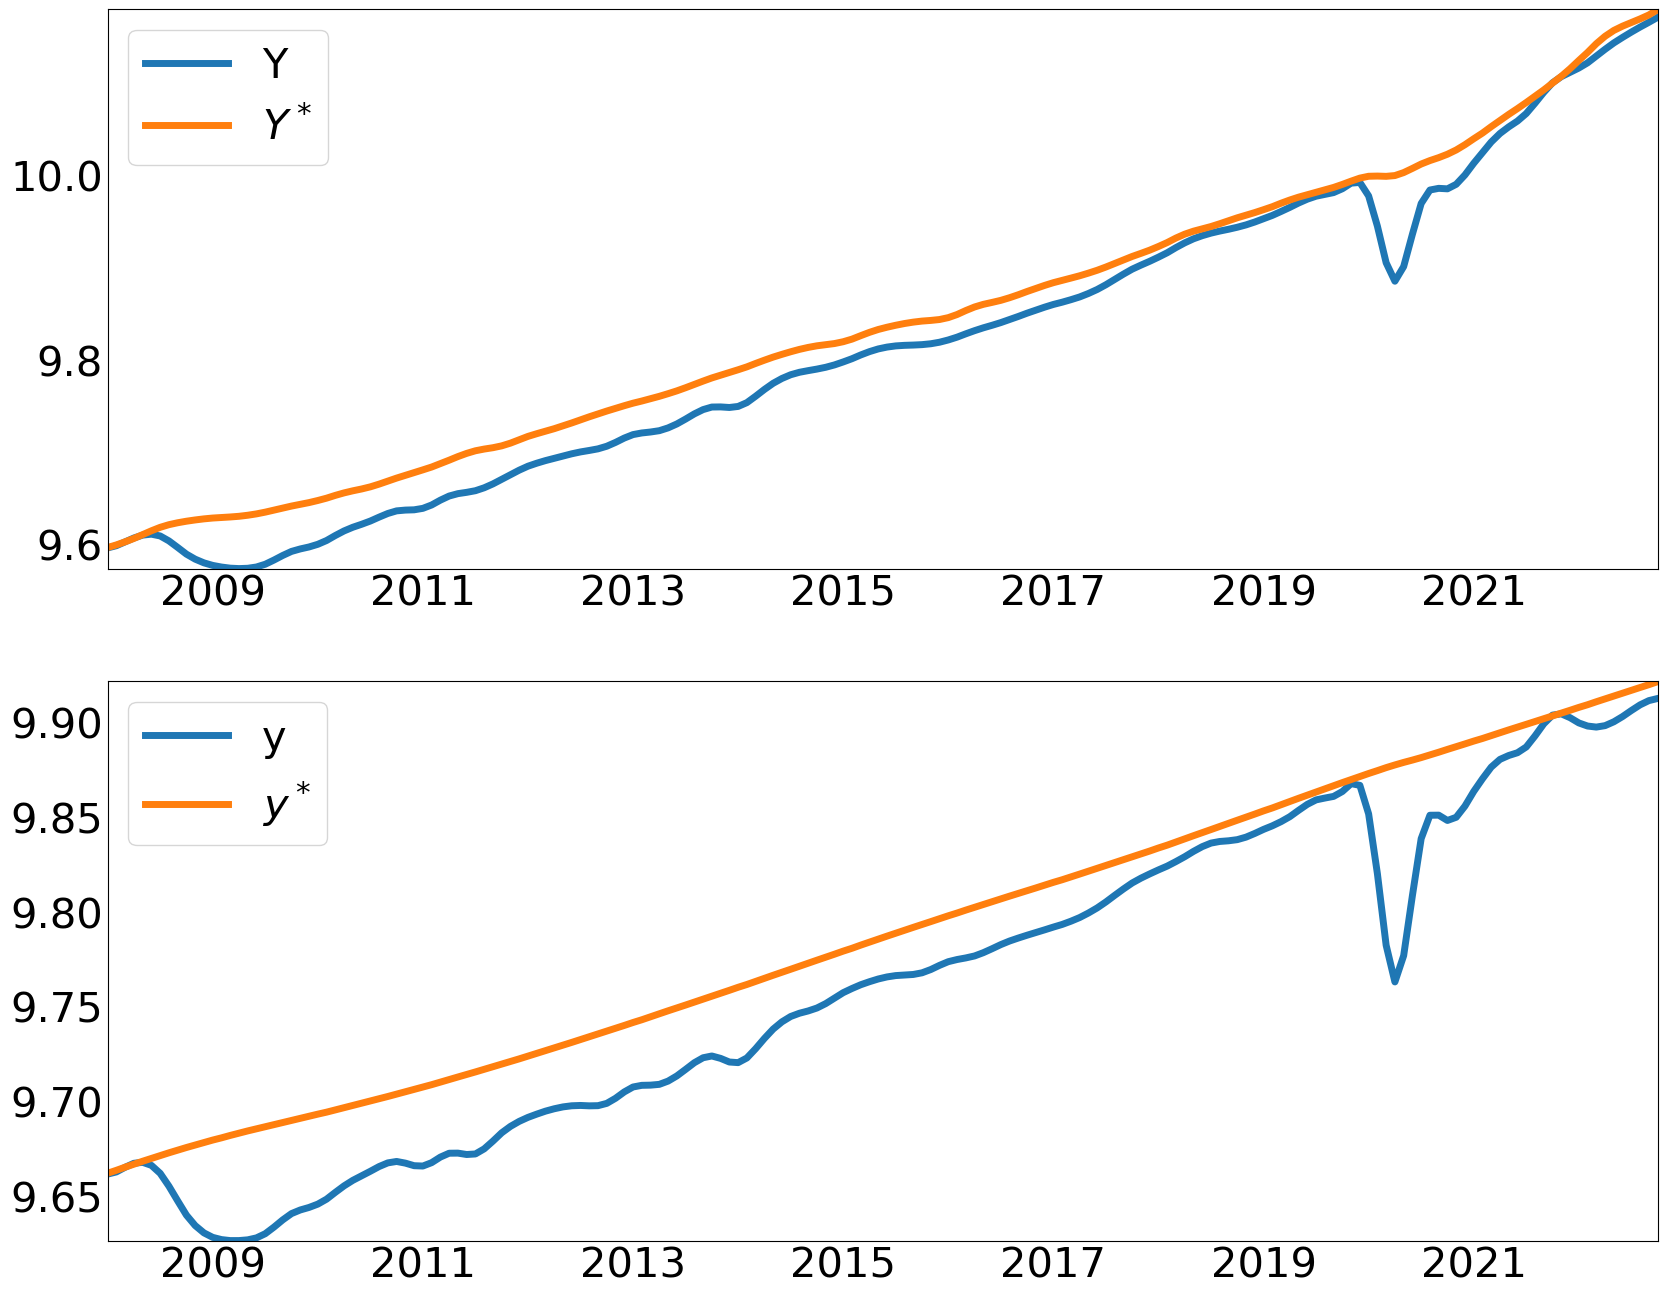

In [8]:
plot_vars = [["Y", "$Y^*$"],["y", "$y^*$"]]
fig, axs = plt.subplots(2,1,figsize = (20, 16))
for i in range(len(plot_vars)):
    pair = plot_vars[i]
    ax = axs[i]
    data["Log"][pair].loc["2008":].plot.line(linewidth = 5, ax = ax)
    ax.set_xlabel("")
    ax.tick_params(axis=u'both', which=u'both',length=0)


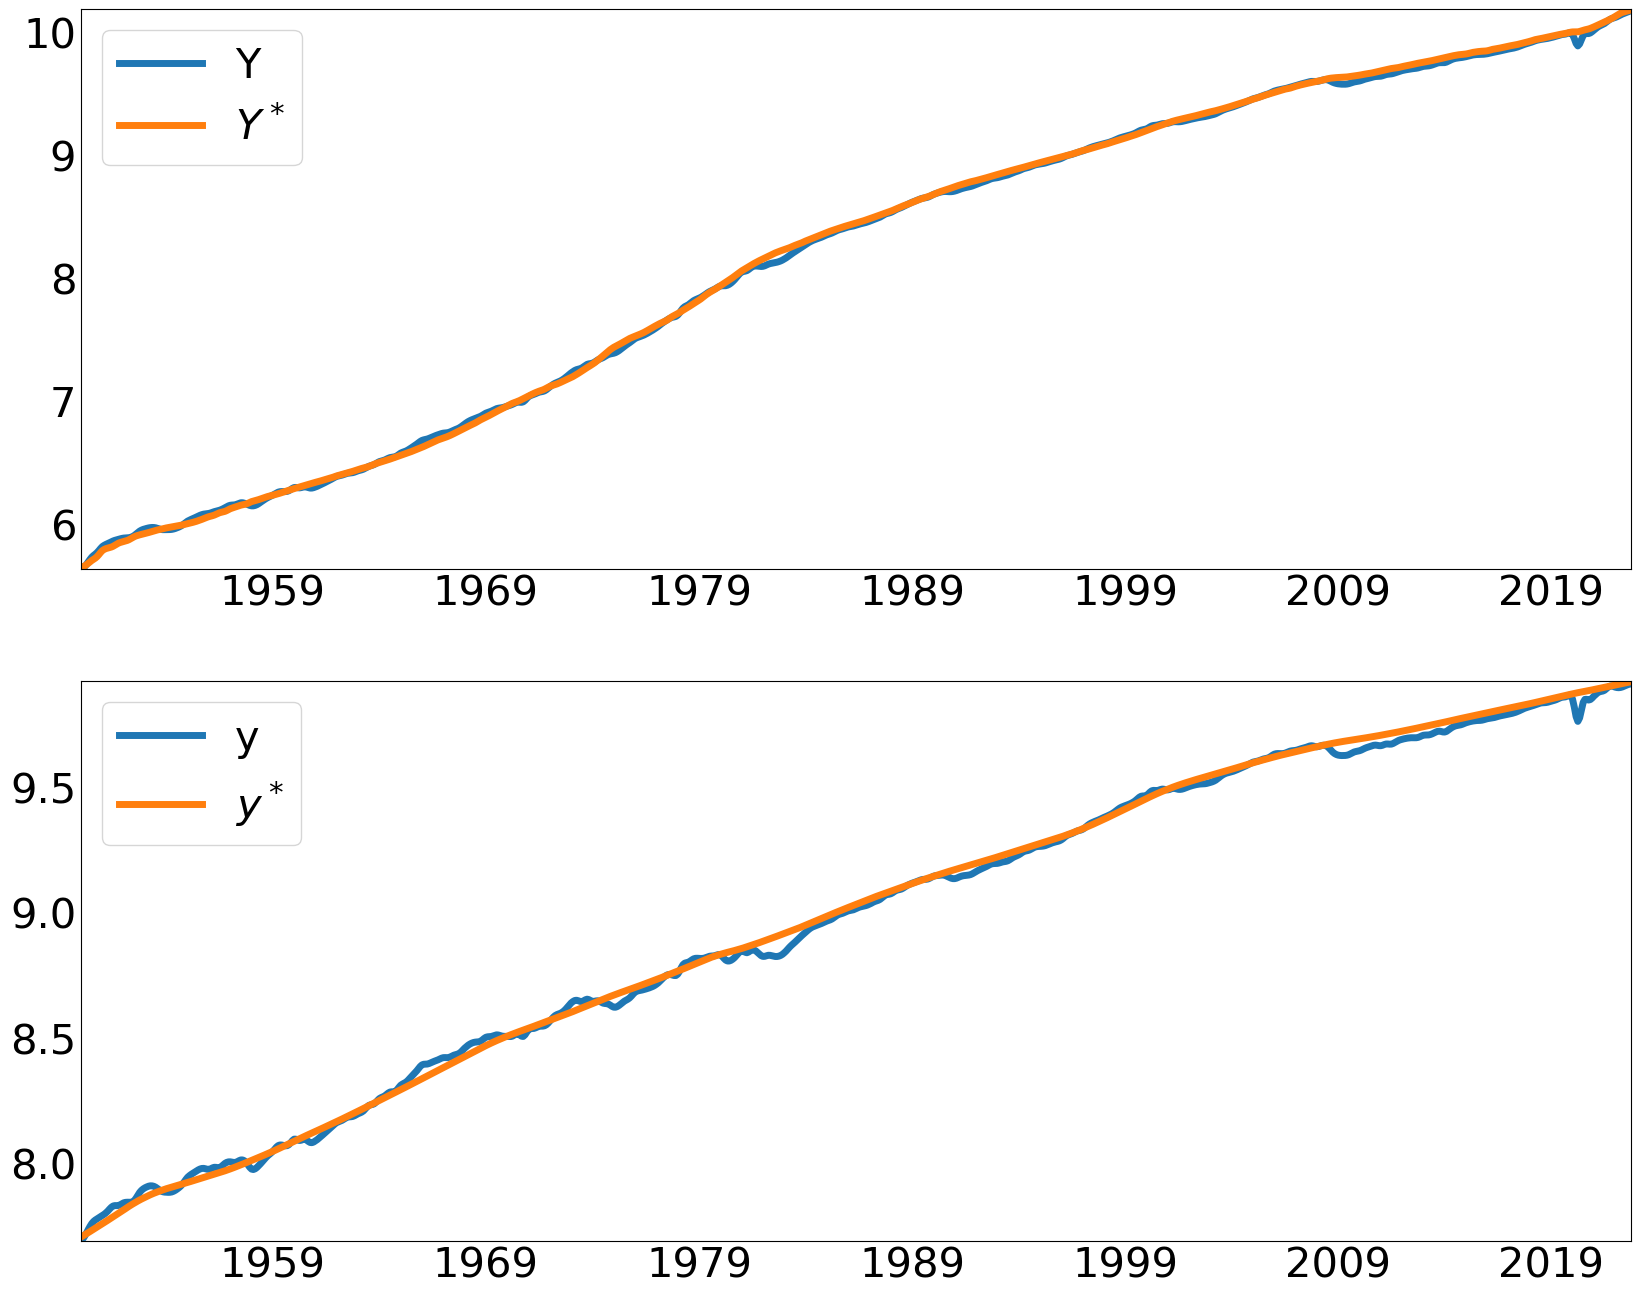

In [9]:
plot_vars = [["Y", "$Y^*$"],["y", "$y^*$"]]
fig, axs = plt.subplots(2,1,figsize = (20, 16))
for i in range(len(plot_vars)):
    pair = plot_vars[i]
    ax = axs[i]
    data["Log"][pair].plot.line(linewidth = 5, ax = ax)
    ax.set_xlabel("")
    ax.tick_params(axis=u'both', which=u'both',length=0)


C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\3732949242.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\3732949242.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


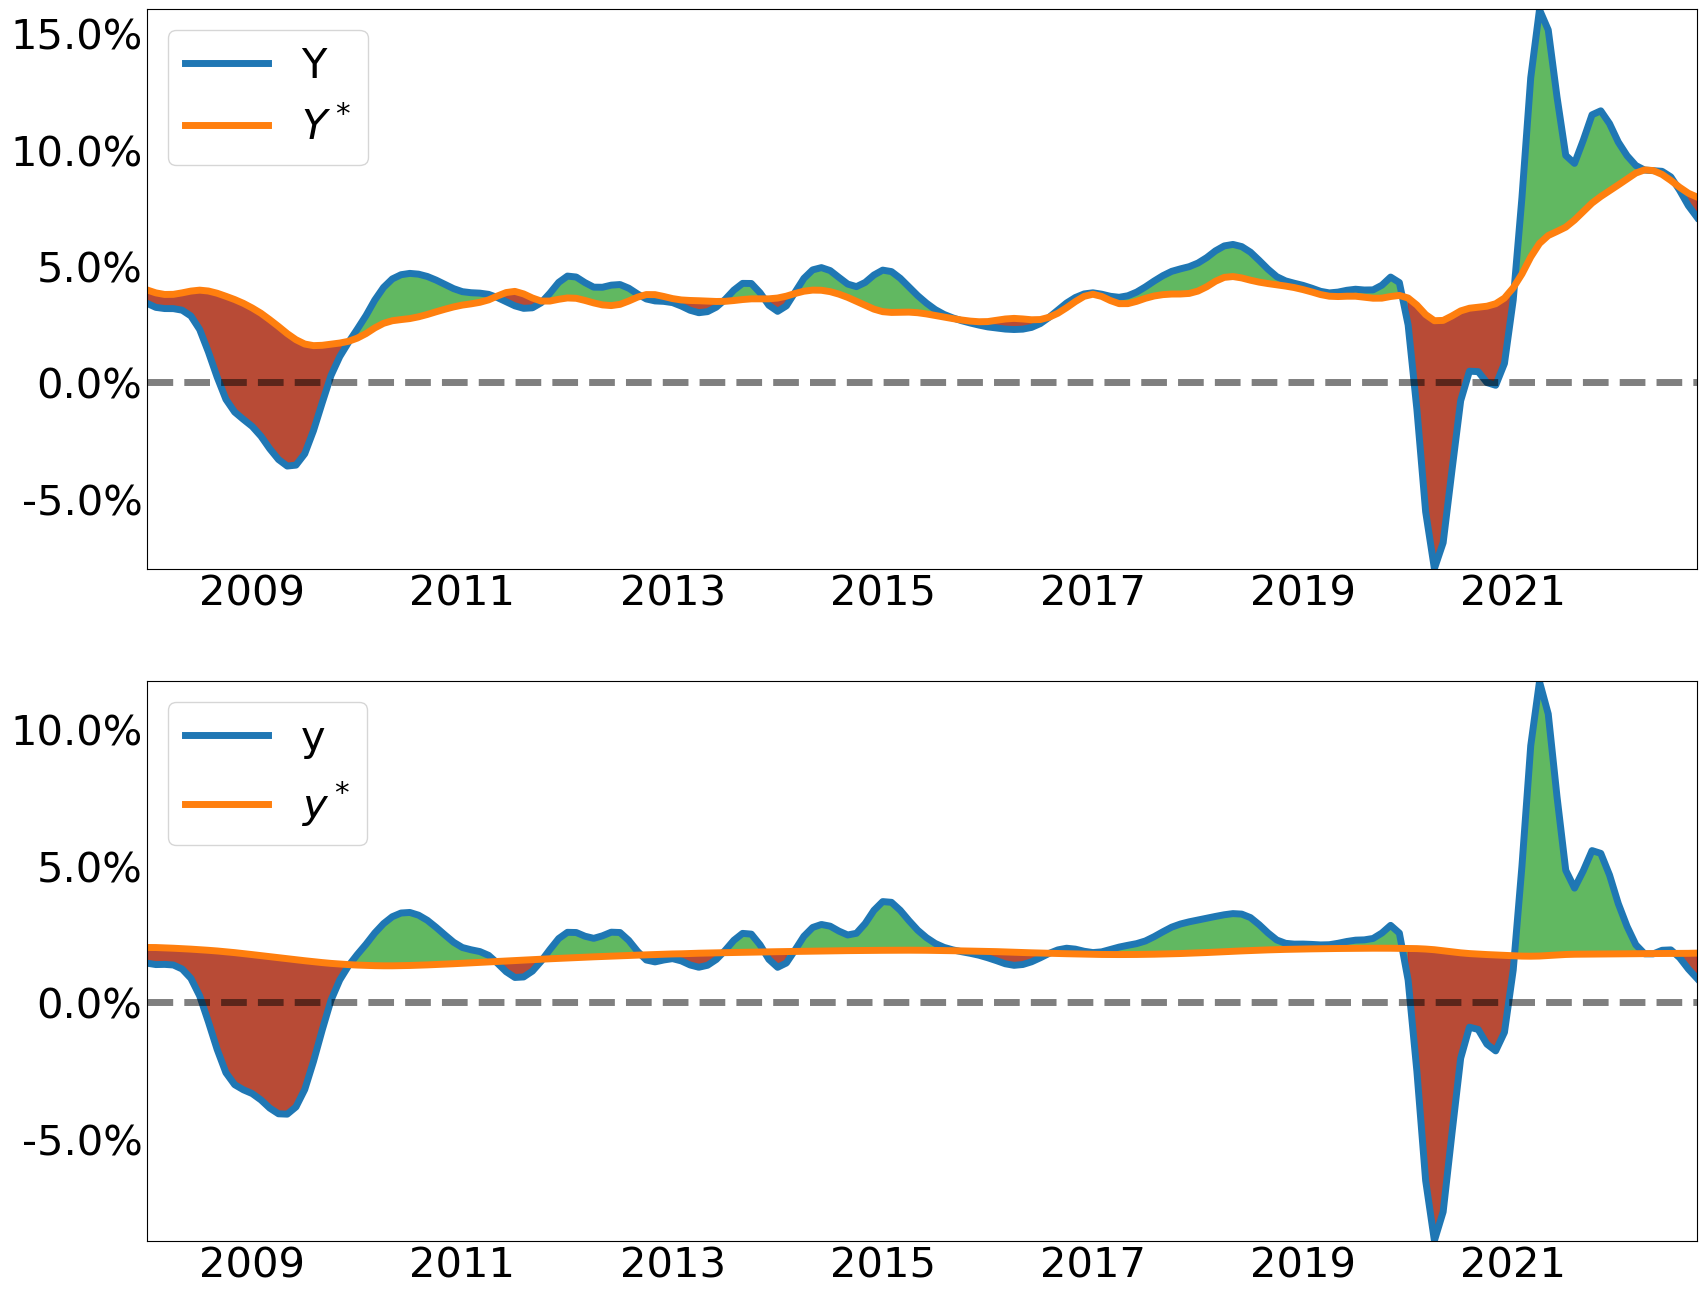

In [10]:
diff = 12
plot_vars = [["Y", "$Y^*$"],["y", "$y^*$"]]
fig, axs = plt.subplots(2,1,figsize = (20, 16))
for i in range(len(plot_vars)):
    pair = plot_vars[i]
    plot_data = data["Rates"][pair].loc["2008":]
    ax = axs[i]
    plot_data.plot.line(linewidth = 5, ax = ax)
    ax.axhline(0, linewidth = 5, ls = "--", color = "k", alpha = .5)
    ax.set_xlabel("")
    red_data = plot_data.copy()
    red_data[pair[0]][red_data[pair[0]] > plot_data[pair[1]]] = np.nan

    ax.fill_between(plot_data.index, plot_data[pair[1]], plot_data[pair[0]], color ="C2", alpha = .75)
    ax.fill_between(red_data.index, red_data[pair[1]], red_data[pair[0]], color ="C3", alpha = .75)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])    


C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\1483535917.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


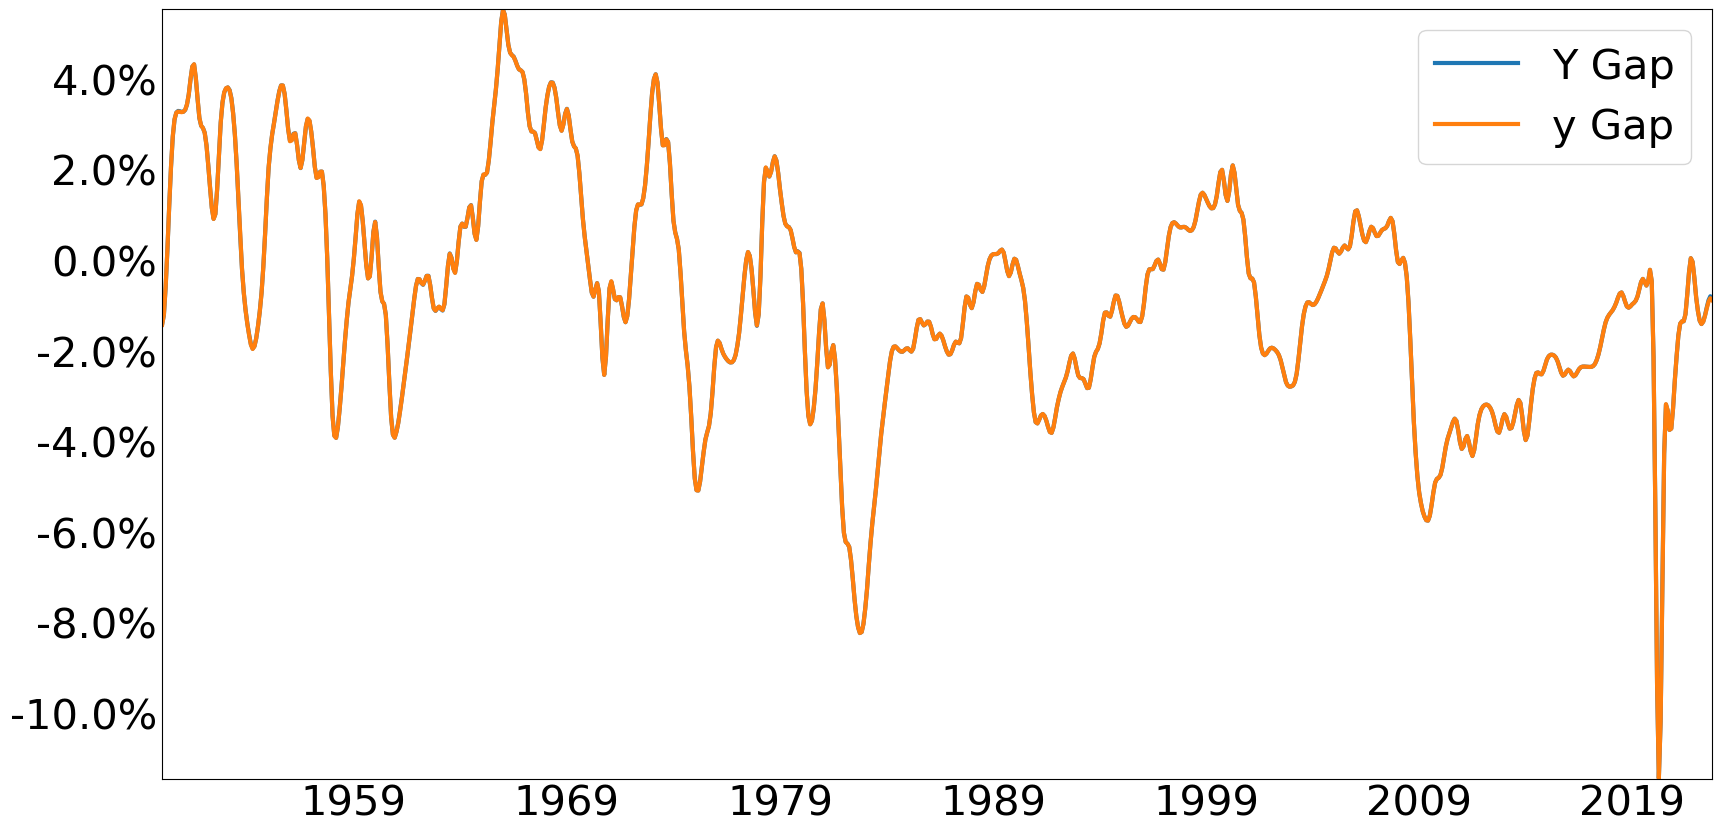

In [11]:
plot_vars = ["Y Gap", "y Gap"]
plot_df = data["Log"][plot_vars]
fig, ax = plt.subplots(figsize = (20, 10))
plot_df.plot.line(ax = ax, linewidth = 3)
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
ax.set_xlabel("")
ax.tick_params(axis=u'both', which=u'both',length=0)


Level Target vs. Rate Target

Level target targets the average rate, where as a rate target does not compensate for past misses.

Nominal GDP Level vs. Price Level Targeting



C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\2372074515.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


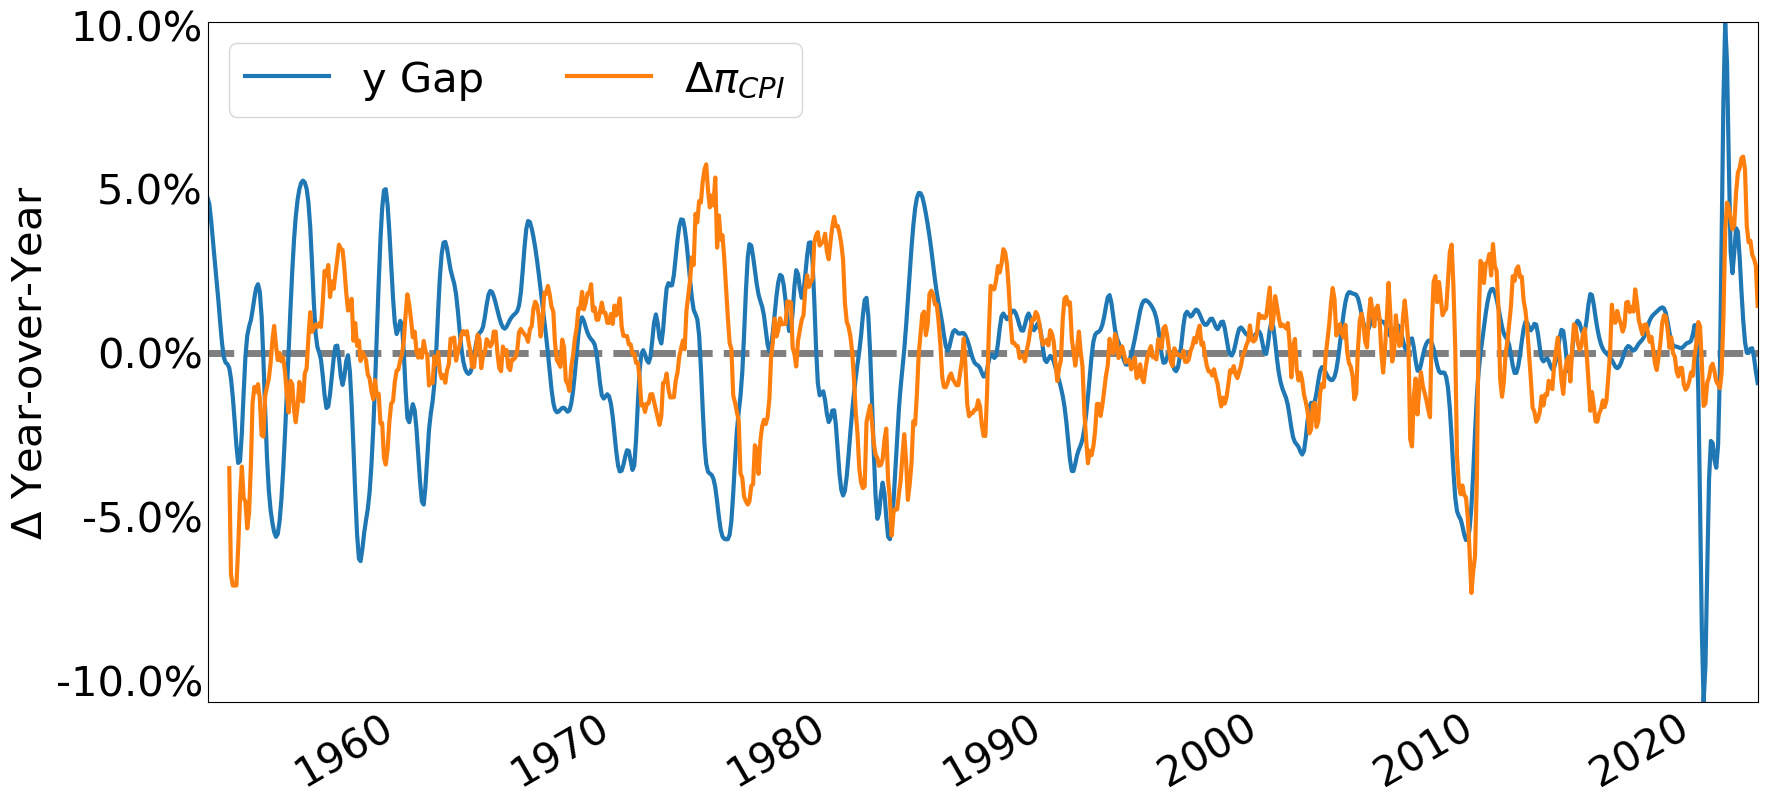

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
plot_vars = ["y Gap", "$\pi_{CPI}$"]
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
plot_df = data["Log"].diff(diff).loc[:].rename(columns = {"CPI":"$\pi_{CPI}$"})[plot_vars]
plot_df["$\Delta$" + plot_vars[1]] = plot_df[plot_vars[1]].diff(diff) 
plot_df[plot_vars[0]].plot.line(ax = ax, linewidth = 3)
plot_df["$\Delta$" + plot_vars[1]].plot.line(ax = ax, linewidth = 3)
ax.legend(ncol = 2)
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
ax.set_ylabel("$\Delta$ Year-over-Year")
ax.set_xlabel("")
ax.tick_params(axis=u'both', which=u'both',length=0)


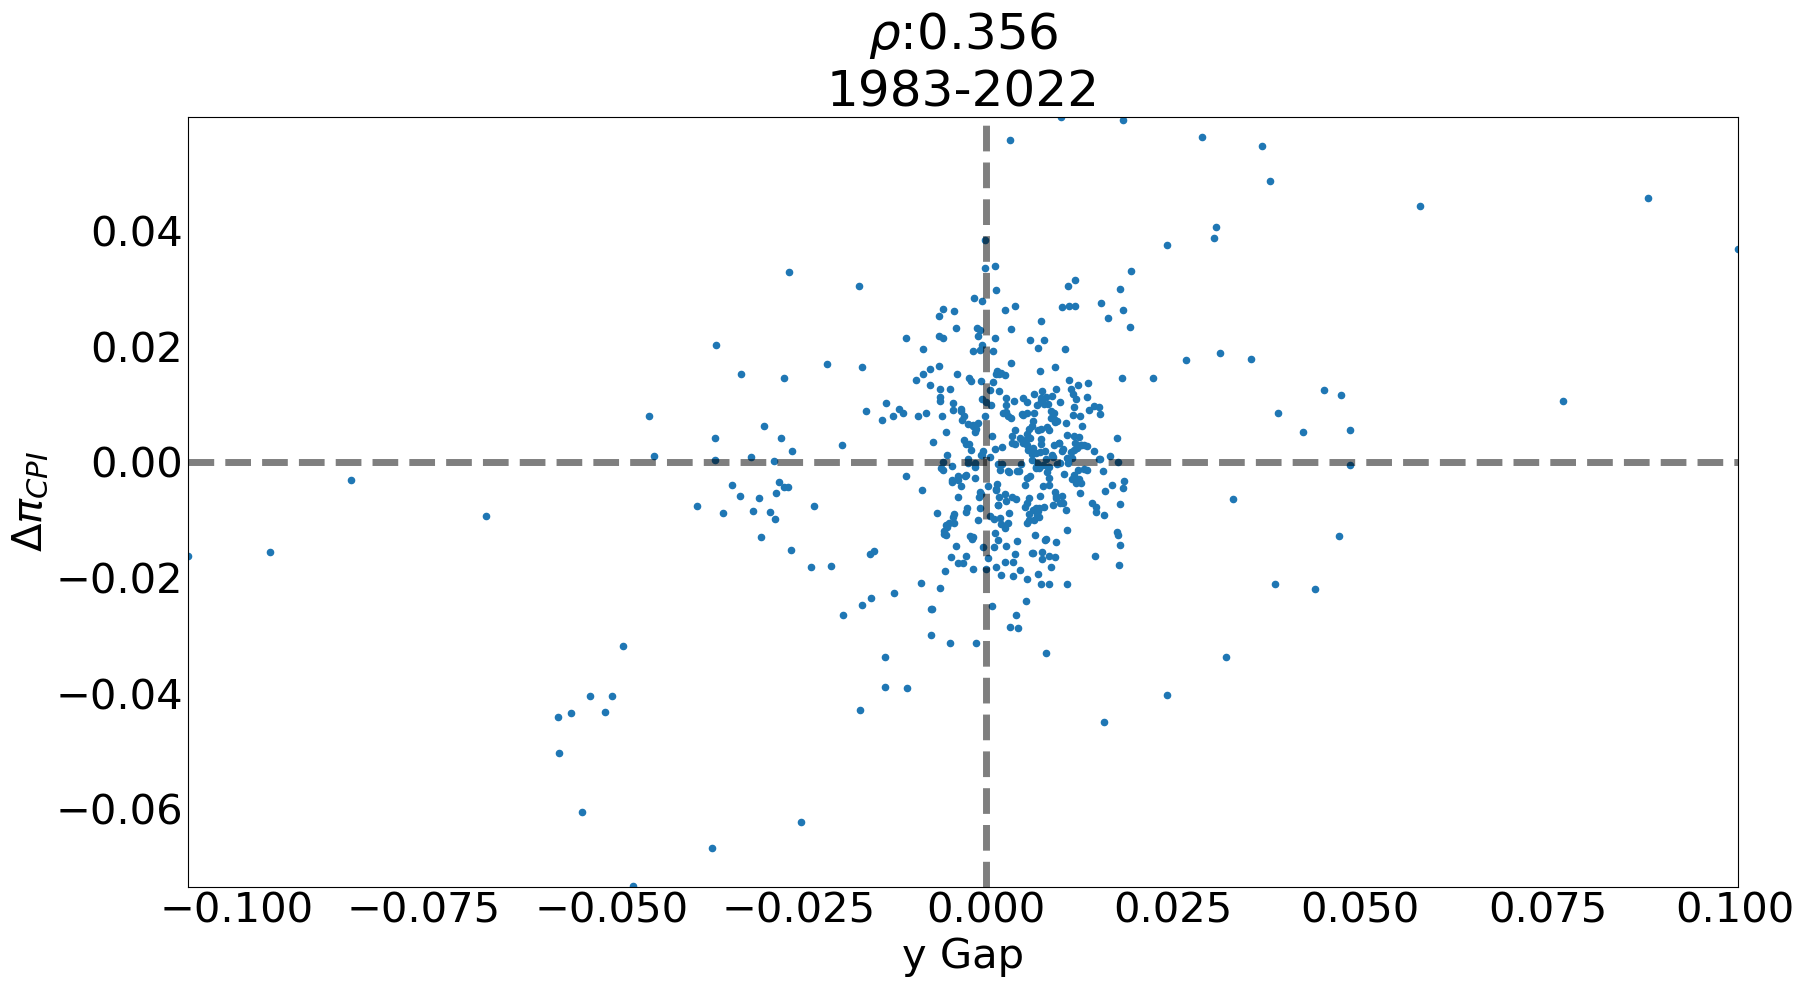

In [13]:
plot_vars = plot_vars = ["y Gap", "$\Delta$$\pi_{CPI}$"]

scatter_df = plot_df[plot_vars].loc["1983":]
fig, ax = plt.subplots(figsize = (20,10))
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.axvline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
scatter_df.plot.scatter(x = plot_vars[0], y = plot_vars[1], ax = ax)
# ax.set_xlabel("$\Delta$" + plot_vars[0])
# ax.set_ylabel("$\Delta$" + plot_vars[1])
ax.set_title("$\\rho$:" + scatter_df.corr().round(3).astype(str)[plot_vars[0]][plot_vars[1]] + "\n1983-2022")
ax.tick_params(axis=u'both', which=u'both',length=0)

# # y_name
# y = plot_data[[y_name]]
# X = plot_data[[x_name]]
# X["Constant"] = 1

# reg = sm.OLS(y, X)
# results = reg.fit()
# plot_data["$\hat{" + y_name + "}$"] = results.predict()
# ax.plot(plot_data[x_name],  plot_data["$\hat{" + y_name + "}$"], color = "C1", alpha = .75, linewidth = 5)
# ax.set_title("$\\beta_{" + x_name.replace("$","") + "}=" + results.params.round(2).astype(str)[x_name] + "$")
# ax.set_xticklabels([str(round(x * 100,2)) + "%" for x in ax.get_xticks()])
# ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
# results.summary()

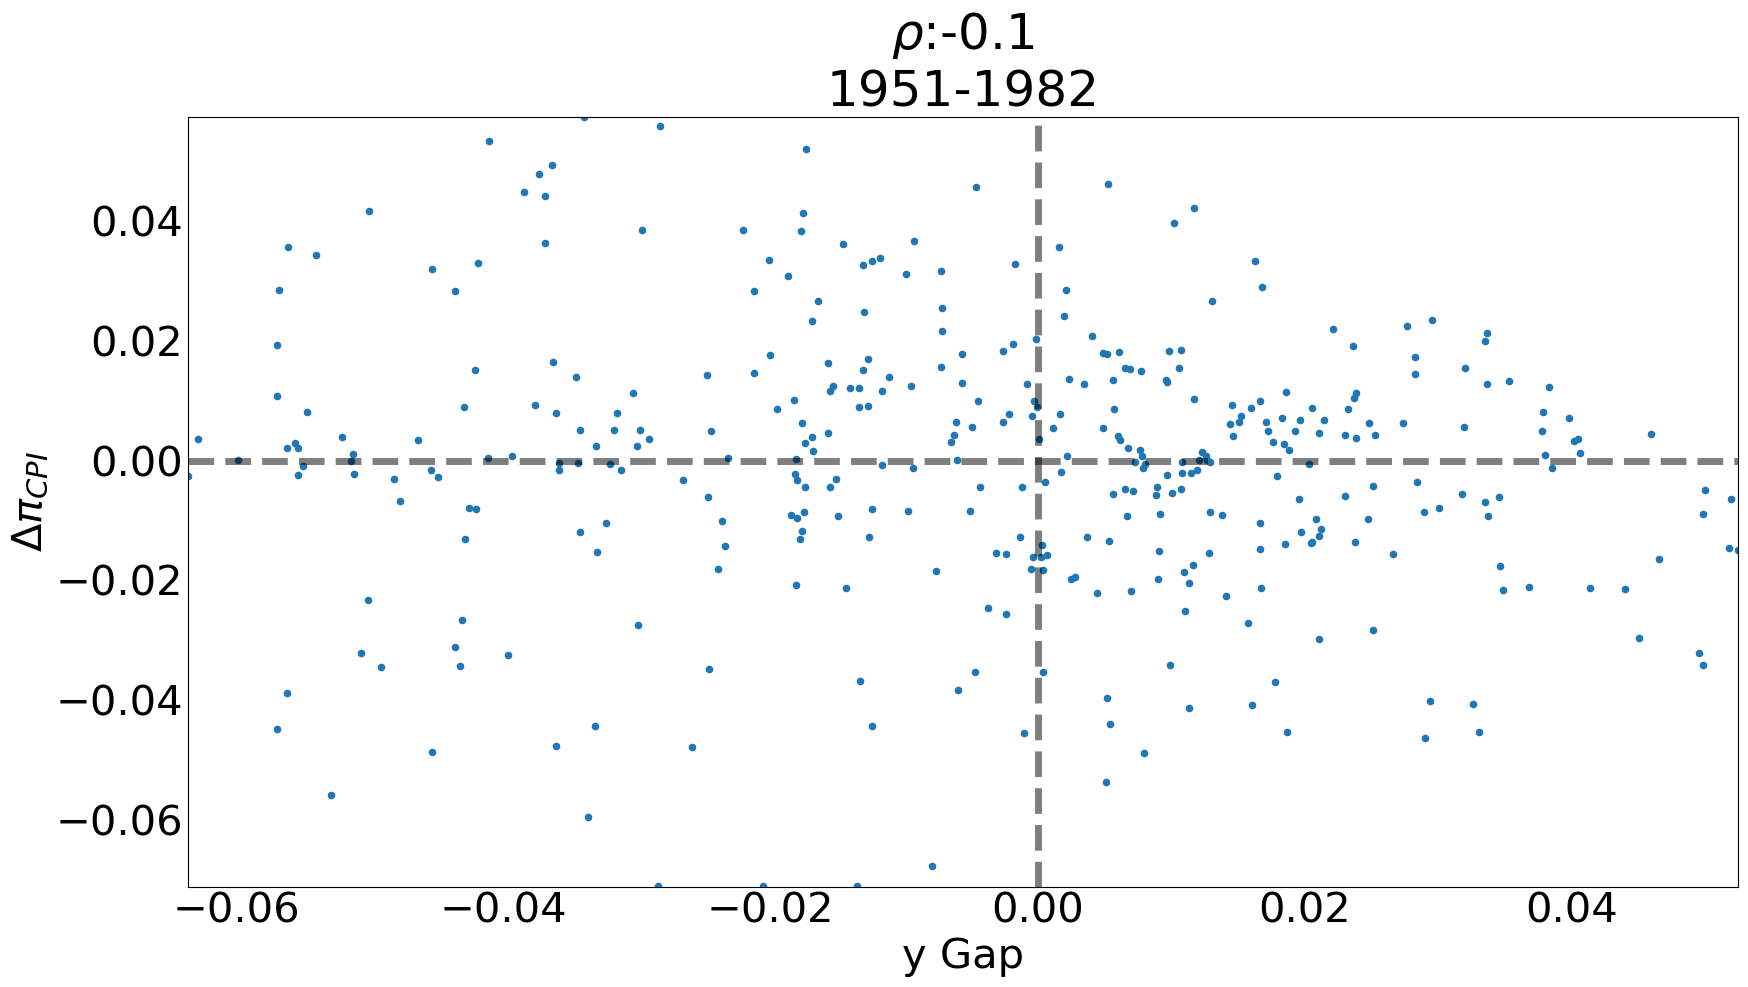

In [14]:
plot_vars = plot_vars = ["y Gap", "$\Delta$$\pi_{CPI}$"]

scatter_df = plot_df[plot_vars].loc[:"1982"]
fig, ax = plt.subplots(figsize = (20,10))
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.axvline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
scatter_df.plot.scatter(x = plot_vars[0], y = plot_vars[1], ax = ax)
ax.set_title("$\\rho$:" + scatter_df.corr().round(3).astype(str)[plot_vars[0]][plot_vars[1]] + "\n1951-1982")
# ax.set_xlabel("$\Delta$" + plot_vars[0])
# ax.set_ylabel("$\Delta$" + plot_vars[1])
ax.tick_params(axis=u'both', which=u'both',length=0)


A nominal income target would operate in a manner simiilar to the price level. The moentary authority could submit itself to a rule where the path of nomnial income should growt at a rate of, say, 5% per year. Notice that the nominal income target does not specify whether that 5% should be composed of price level or real income growth. Rather, the path of total expenditures is stabilized. This has several benefits. First, overshoot is easier to compensate for in a nominal income level target than in an inflation target with a relatively low rate of inflation. Suppose, for example, that monetary policy unintentionally overshoots the 5% target. generating an extra 3% inflation on top of the nominal income target. Let's suppose that real income growth had been 2%. The remaining growth in total expenditures represents a 6% rate of inflation year-over-year. Consider if, instead, a 2% inflation target had been adopted. Subsequently, nearly two years of 0% inflation would be required to offset this excess. Whereas, with a nominal income target of 5%, the overshoot can be compensated for by targeting approximately 2% growth in nominal income the following year the following year. After one year of nominal income growth of approximately 2%, nominal income would return to target.

From the example, we can see that compared to an inflation level target, a nominal income target allows for flexibility in policy adjustment required to maintain the monetary rule. Yet, this is not the only reason to favor a nominal income level target. Although real income and nominal income not the same, falls in nominal income tend to be associated with falls in real income. More important, significant contractions in nominal income are associated with similar contractions in real income. Likewise, a failure oif nominal income to return to its growth path will often result in the same short-fall for real income. Let's suppose, for example, that the Federal Reserve was targeting a nominal growth path implied by %Y^*$, potential nominal GDP. Ignore for a moment that, for all but recent observations, potential nominal GDP is simply a transformation of potential real GDP that adds inflation. We can see that a fall in NGDP that is not offset by a positive aggregate demand shock that would return NGDP to trend seems also to allow real GDP to remain below trend. The more recent recession. Thus, recession in the early 1990s, in the early 2000s, and more recent in 2020, did little to push observed NGDP significantly below trend. The same is true for observed real GDP. However, during the 2008 Financial Crisis, both real GDP and NGDP remained well below the long-run growth path. The growth rate of estimated potential real GDP slowed and, even then, observed real GDP remained below that estimate.

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\276190340.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


Text(0.5, 0, '')

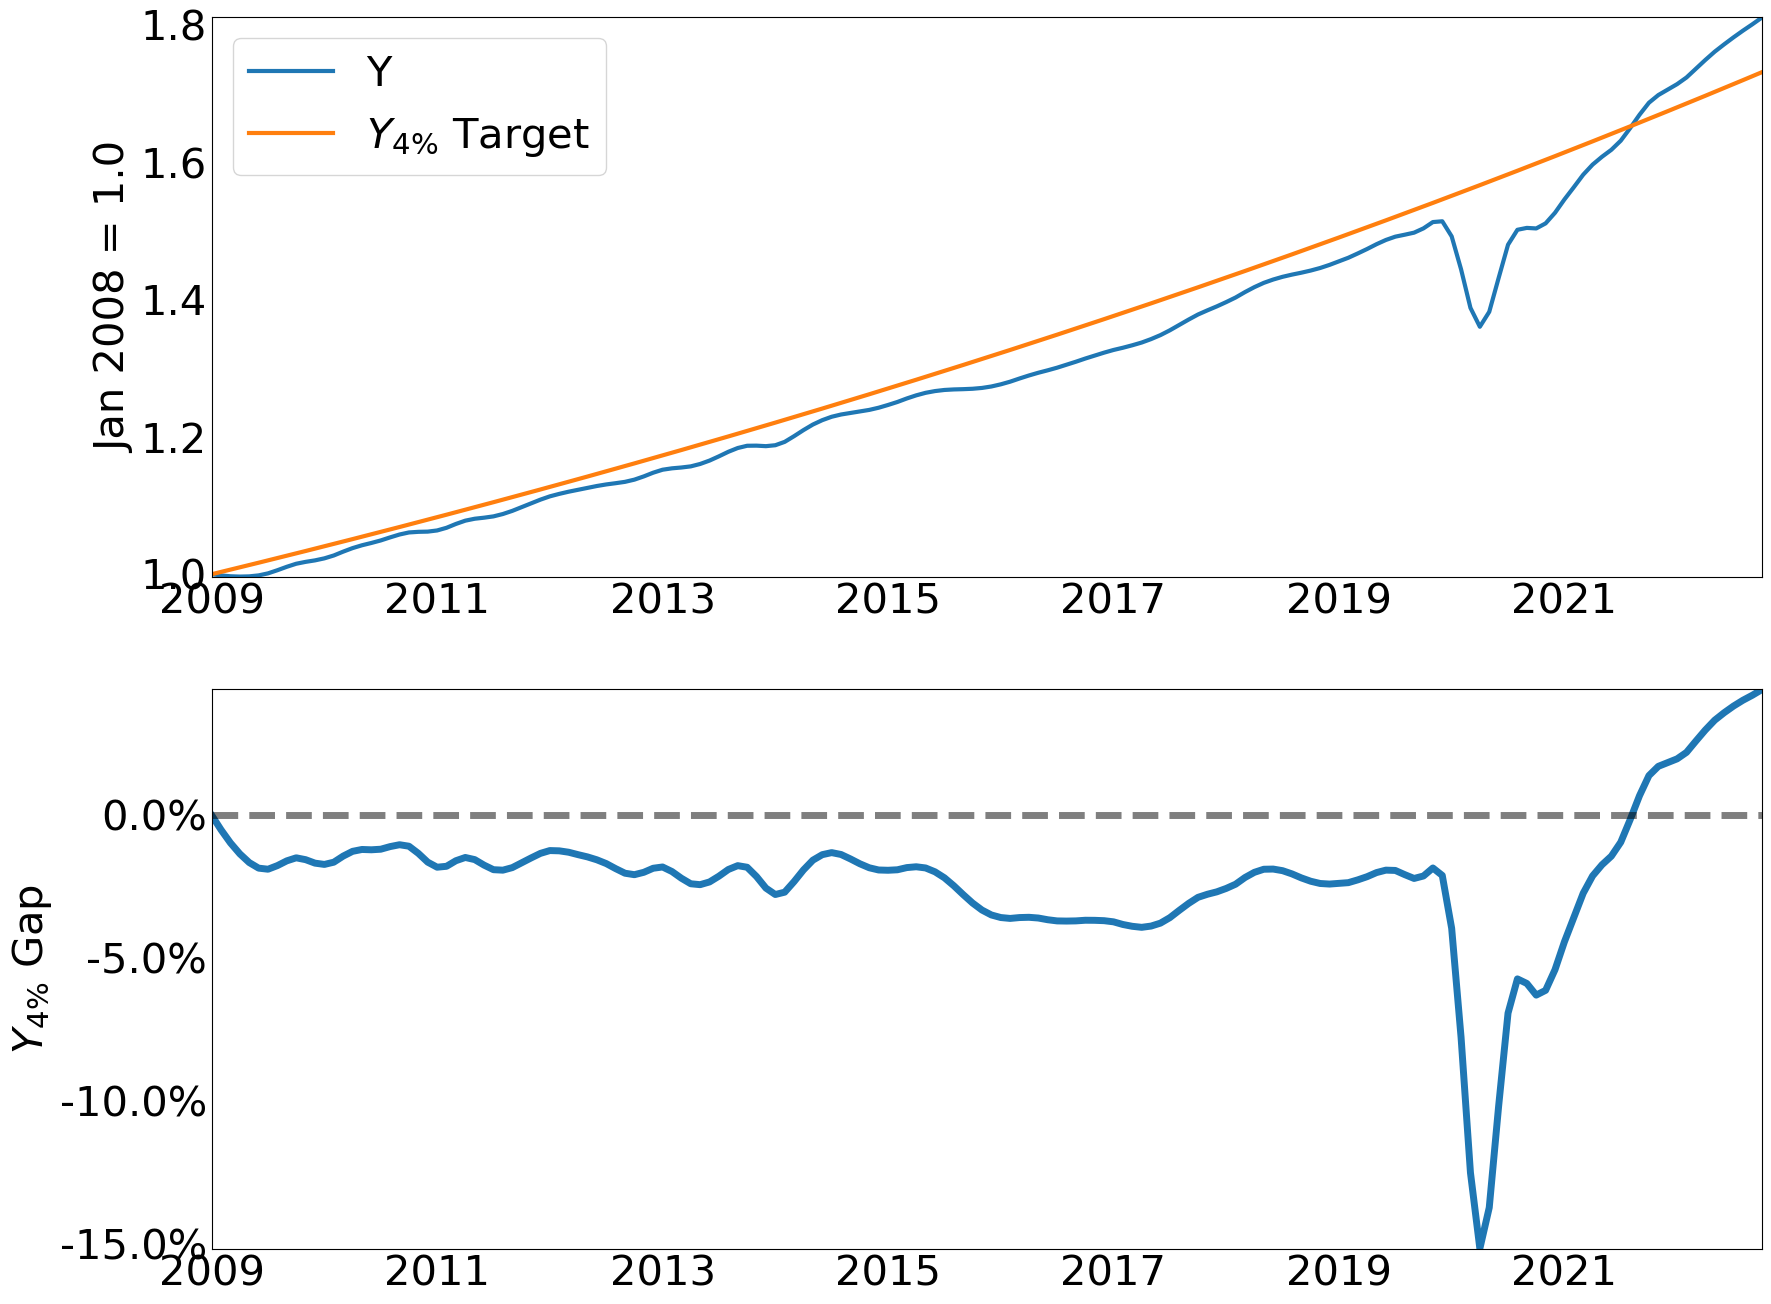

In [15]:
plot_vars = ["Y"]
plot_df = data["Level"][plot_vars].loc["2009":]
plot_df["Y"] = plot_df["Y"].div(plot_df["Y"].iloc[0])
plot_df["$Y_{4\%}$ Target"] = [plot_df["Y"].iloc[0] * ((1 + .04 / 12) ** i) for i in range(len(plot_df.index))]
fig, axs = plt.subplots(2,1, figsize = (20,16))
ax = axs[0]
plot_df.plot.line(ax = ax, linewidth = 3)
ax.set_ylabel("Jan 2008 = 1.0")
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("")
ax = axs[1]
plot_df["$Y_{4\%}$ Gap"] = 1 - plot_df["$Y_{4\%}$ Target"].div(plot_df["Y"])
plot_df["$Y_{4\%}$ Gap"].plot(linewidth = 5, ax = ax)
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("$Y_{4\%}$ Gap")
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
ax.set_xlabel("")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\2924545272.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


Text(0.5, 0, '')

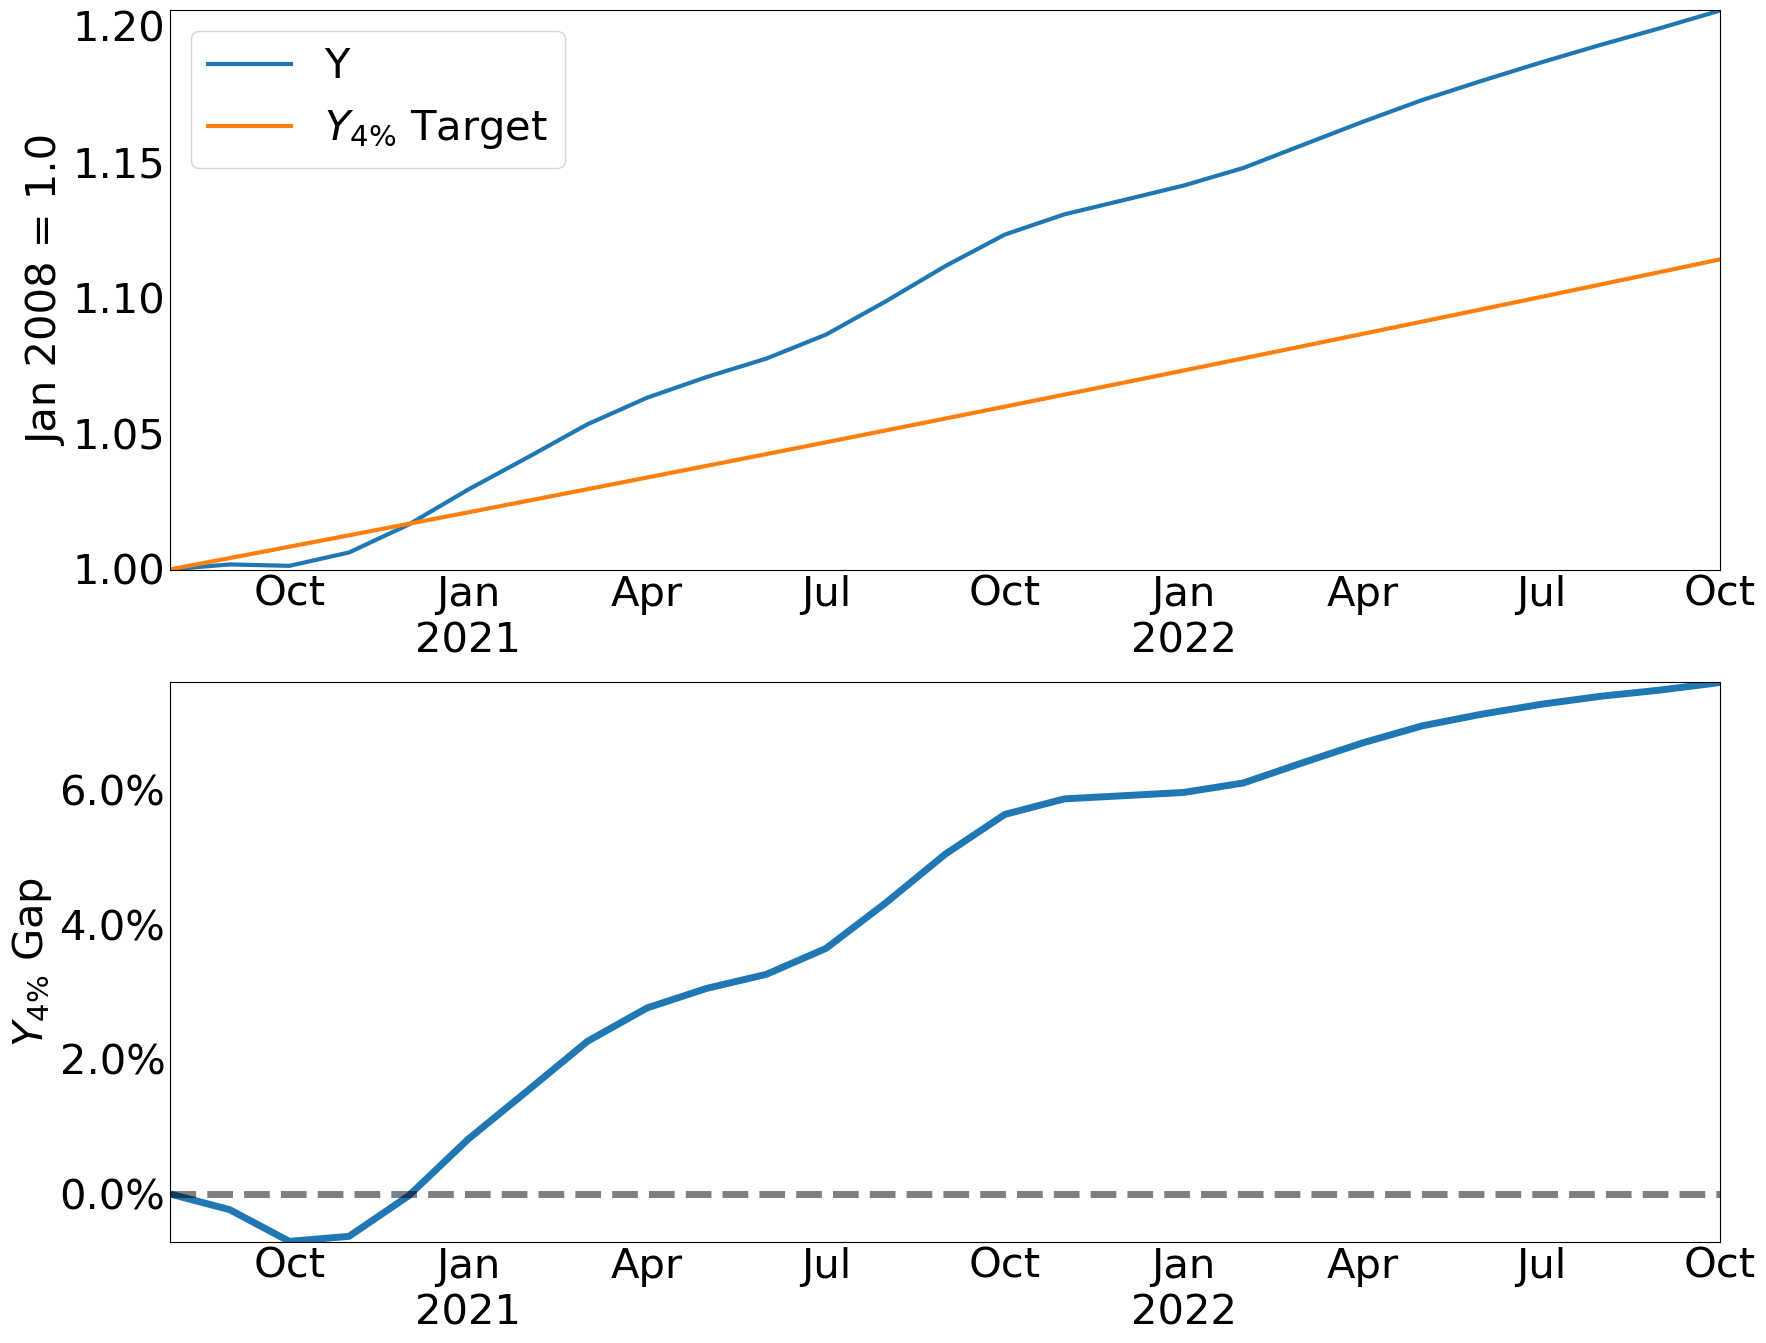

In [16]:
plot_vars = ["Y"]
plot_df = data["Level"][plot_vars].loc["2020-08":]
plot_df["Y"] = plot_df["Y"].div(plot_df["Y"].iloc[0])
plot_df["$Y_{4\%}$ Target"] = [plot_df["Y"].iloc[0] * ((1 + .05 / 12) ** i) for i in range(len(plot_df.index))]
fig, axs = plt.subplots(2,1, figsize = (20,16))
ax = axs[0]
plot_df.plot.line(ax = ax, linewidth = 3)
ax.set_ylabel("Jan 2008 = 1.0")
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("")
ax = axs[1]
plot_df["$Y_{4\%}$ Gap"] = 1 - plot_df["$Y_{4\%}$ Target"].div(plot_df["Y"])
plot_df["$Y_{4\%}$ Gap"].plot(linewidth = 5, ax = ax)
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("$Y_{4\%}$ Gap")
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
ax.set_xlabel("")

#### Nominal Income and Interest Rate Stability

Recall that the nominal interest rate is a function of the growth rate of nominal income. When the growth path of nominal income is uncertain, so too is the nominal interest rate. After the 2008 crisis, it was unclear that the Federal Reserve would allow the rate of inflation to rise to offset the fall in real income. If you think only in terms of the Fisher Theory, that $r = \rho_e + \pi_e$, then you might be tempted to think that the low inflation environment will not impact real interest rates. However, by including the growth rate of nominal income, monetary policy can impact nominal and real components, much as the current dual mandate facilitates. Recall:

$$r = k_0 + \%\Delta Y_e$$

If investors are pessimistic about the future path of nominal income, they will be less likely to invest. The expectation becomes a self-fulfilling prophecy. Persistently low interest rates are a sign of low expected nominal income growth. Low expected income growth is a sign of tight monetary policy. The problem is magnified further by uncertainty in the growth path of income. An uncertain path of nominal income necessarily generates interest rate volatility, presuming interest rates aren't at a floor of 0\%.

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\881808158.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(round(x * 100,2)) + "%" for x in ax.get_xticks()])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_20876\881808158.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     45.17
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           5.17e-11
Time:                        22:29:46   Log-Likelihood:                 962.91
No. Observations:                 478   AIC:                            -1922.
Df Residuals:                     476   BIC:                            -1913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
$r_{10}$       0.8901      0.132      6.721      0.000       0.630       1.150
Constant       0.0036      0.002      2.367      0.018       0.001       0.007
==============================================================================
Omnibus:                      260.829   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3067.466
Skew:                           2.102   Prob(JB):                         0.00
Kurtosis:                      14.677   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

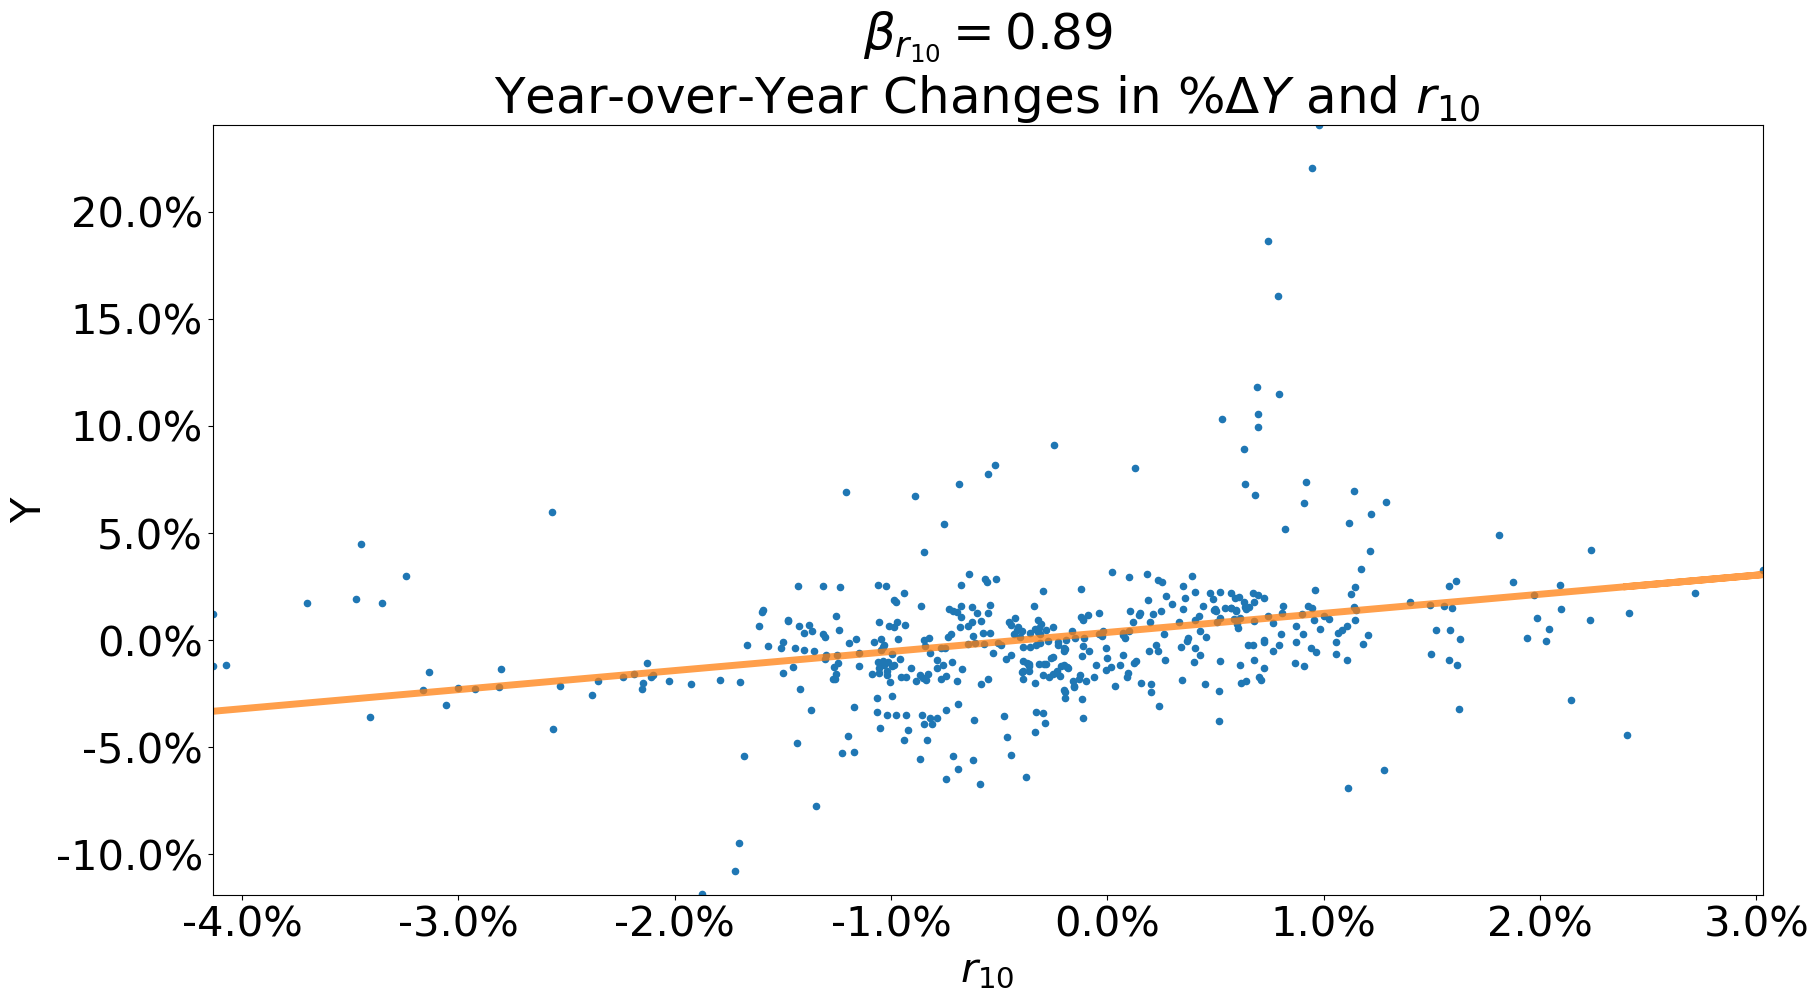

In [25]:
import statsmodels.api as sm
fig, ax  = plt.subplots(figsize = (20,10))
plot_vars = ["$r_{10}$", "Y"]
x_name, y_name = plot_vars
plot_data = data["Rates"][plot_vars].diff(diff).loc["1983":].dropna()
plot_data.plot.scatter(x = x_name, 
             y = y_name, 
             ax = ax)
y = plot_data[[y_name]]
X = plot_data[[x_name]]
X["Constant"] = 1

reg = sm.OLS(y, X)
results = reg.fit()
plot_data["$\hat{" + y_name + "}$"] = results.predict()
ax.plot(plot_data[x_name],  plot_data["$\hat{" + y_name + "}$"], color = "C1", alpha = .75, linewidth = 5)
ax.set_title("$\\beta_{" + x_name.replace("$","") + "}=" + results.params.round(2).astype(str)[x_name] + "$\nYear-over-Year Changes in $\%\Delta Y$ and " + x_name)
ax.set_xticklabels([str(round(x * 100,2)) + "%" for x in ax.get_xticks()])
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
results.summary()